<a href="https://colab.research.google.com/github/sebastianbarros1976/Loan_Campaign_Prediction_Decision_Tree-Model/blob/main/Loan_Modelling_Sebastian_Barros_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [18]:
#Updating Google Colab to Pandas 2.0.3 to be compatible with other libraries
!pip install pandas==2.0.3
!pip install numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user



**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [19]:
# Installing the libraries with the specified version.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression #for analysis on linear regression
from sklearn.model_selection import train_test_split #for splitting test and train data
from sklearn.tree import DecisionTreeClassifier #for decision tree modeling
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score # For model evaluation
from sklearn.metrics import confusion_matrix #Visualize confision matrix
from sklearn.metrics import make_scorer, recall_score #For custom scoring GridSearchCV
from sklearn.model_selection import GridSearchCV # For hyperparameter tunning
from sklearn import tree # For vizualiting decision trees

#To ignore future warnings
import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [20]:
#Connect to Google Drice
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd # Importing Pandas library
df_main = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")

In [22]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

In [23]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [25]:
data.shape


(5000, 14)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [27]:
data.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [28]:
# Checking for repeated values
print(data["ID"].nunique())

5000


In [29]:
# checking for duplicate values
data.duplicated().sum()

0

#### Observations:
1. In this dataframe there are 14 columns (including order ID), where all are integers except one is float number(decimals)
2. There seems to be no missing data points
3. There are no missing values
4. Personal_Loan is the dependent variable for this case and the one we need to predict with our Decision Tree
5. There are no duplicate IDs
```



## Data summary

In [30]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [31]:
#Let´s calculate the education level in percentage for this data
education_percentages = data['Education'].value_counts(normalize=True).sort_index() * 100
print(education_percentages)


Education
1    41.92
2    28.06
3    30.02
Name: proportion, dtype: float64


In [32]:
#Let´s calculate customers without a mortgage (Zero values)
zero_mortgages = (data['Mortgage'] == 0).sum()

# Calculate the total number of mortgages
total_mortgages = data['Mortgage'].count()

# Calculate the percentage of zero mortgages
percentage_zero_mortgages = (zero_mortgages / total_mortgages) * 100

# Display the percentage
print(f"Percentage of people with no Mortgage: {percentage_zero_mortgages:.2f}%")


Percentage of people with no Mortgage: 69.24%


In [33]:
#Let'´s calculate the mean Mortgage value only for customers with Mortgage

# Filter out the zero values in the Mortgage column
non_zero_mortgages = data[data['Mortgage'] != 0]

# Calculate the mean of the remaining values
mean_mortgage = non_zero_mortgages['Mortgage'].mean()

# Display the mean
print(f"Mean Mortgage excluding mortgages that are zero: {mean_mortgage:.2f}")


Mean Mortgage excluding mortgages that are zero: 183.68


**Observations and data issues**   


* There are negative experiences years, so we need to fix this
* Average customer is 45 years old, with 20 years work experience 73K USD income
* Family size is in average 2.1 showing a fairly small number of people.
* 42% of customers only have undergratuated degree
* 70% of customers don´t have mortage
* Average Mortage is 183K USD
* Only 9.6% of customers accepted the personal loan campaign from this df
* 10.4% of customers have a security account with the bank
* Only 6% of customers have a deposit account with the bank
* 56% of customers use the online channel
* 29% of customers have a credit card outside Allbanks
* We will drop the ID column as it doesn´t add any value


####Fixing Negative years experience issue

In [34]:
# Count the number of negative experience values for each age
negative_experience_counts = data[data['Experience'] < 0].groupby('Age')['Experience'].count()

# Print the counts for each age
print("Number of invalid 'Experience' values for each age (below zero):")
print(negative_experience_counts)


Number of invalid 'Experience' values for each age (below zero):
Age
23    12
24    17
25    18
26     1
28     1
29     3
Name: Experience, dtype: int64


In [35]:
# Calculate the mean experience for each age group
age_experience_mean = data.groupby('Age')['Experience'].mean().reset_index()

# Print the mean experience for each age group
print(age_experience_mean)


    Age  Experience
0    23   -1.666667
1    24   -1.071429
2    25   -0.018868
3    26    0.961538
4    27    1.923077
5    28    2.961165
6    29    3.715447
7    30    4.860294
8    31    5.552000
9    32    6.850000
10   33    7.641667
11   34    8.932836
12   35    9.556291
13   36   10.635514
14   37   11.820755
15   38   12.860870
16   39   13.766917
17   40   14.904000
18   41   16.029412
19   42   17.000000
20   43   18.033557
21   44   19.057851
22   45   19.724409
23   46   20.834646
24   47   21.893805
25   48   22.838983
26   49   23.756522
27   50   24.652174
28   51   25.806202
29   52   26.813793
30   53   27.464286
31   54   28.412587
32   55   29.312000
33   56   30.488889
34   57   31.590909
35   58   32.559441
36   59   34.000000
37   60   34.645669
38   61   35.672131
39   62   36.829268
40   63   37.638889
41   64   38.846154
42   65   39.812500
43   66   40.875000
44   67   41.833333


In [36]:
# Impute negative experience values with zero as we assume young peole will have 0-1 years experience
data.loc[data['Experience'] < 0, 'Experience'] = 0

In [37]:
#Check changes in data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


No major changes in experience but we have eliminated the negative values

#### Droping ID column
* Since all the values in ID column are unique we can drop it


In [38]:
# Drop ID Column before doing the EDA
data.drop(["ID"], axis=1, inplace=True)

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Preparing plots

In [39]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [40]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [41]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

####Observations on **Age**

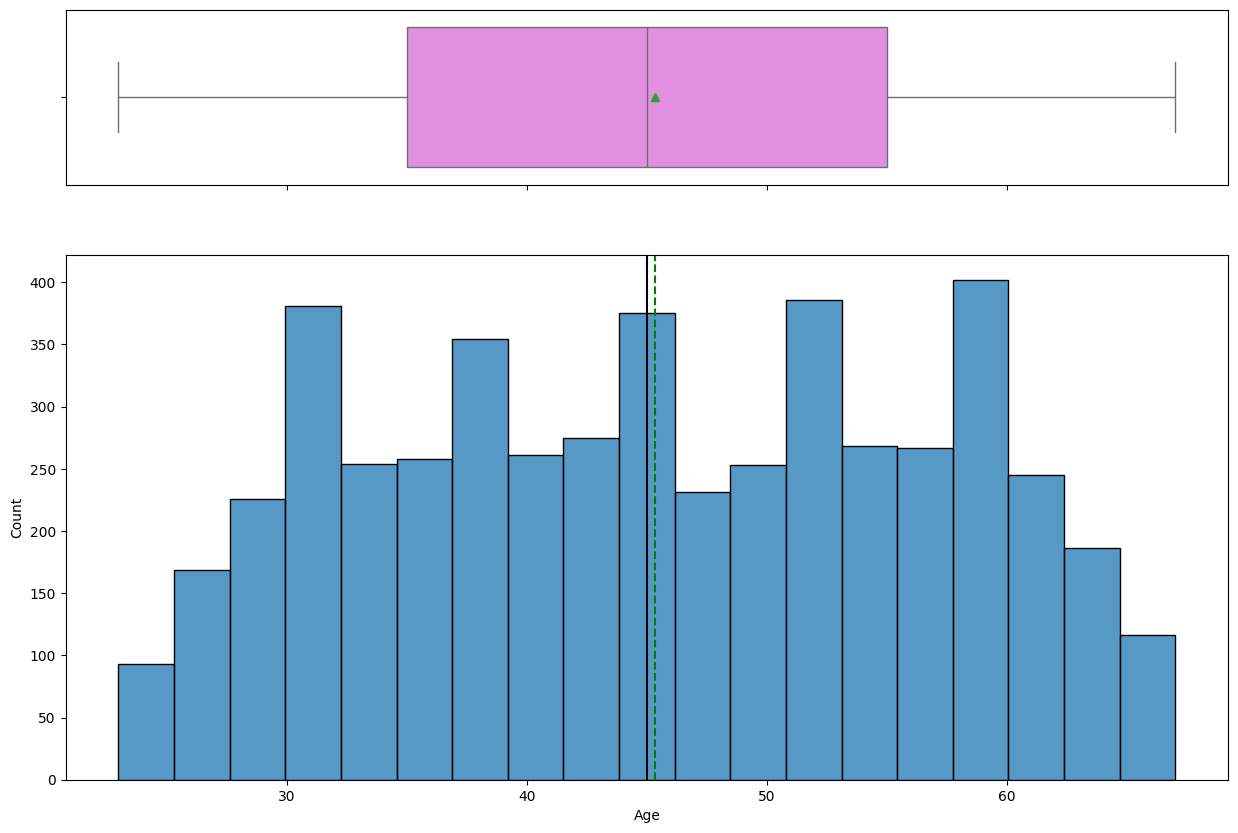

In [43]:
histogram_boxplot(data, "Age")

Age mean is 45 years old and there are no outliers
There seems to be some age concentrations around 55, 30, and 45s

####Observations on **Experience**

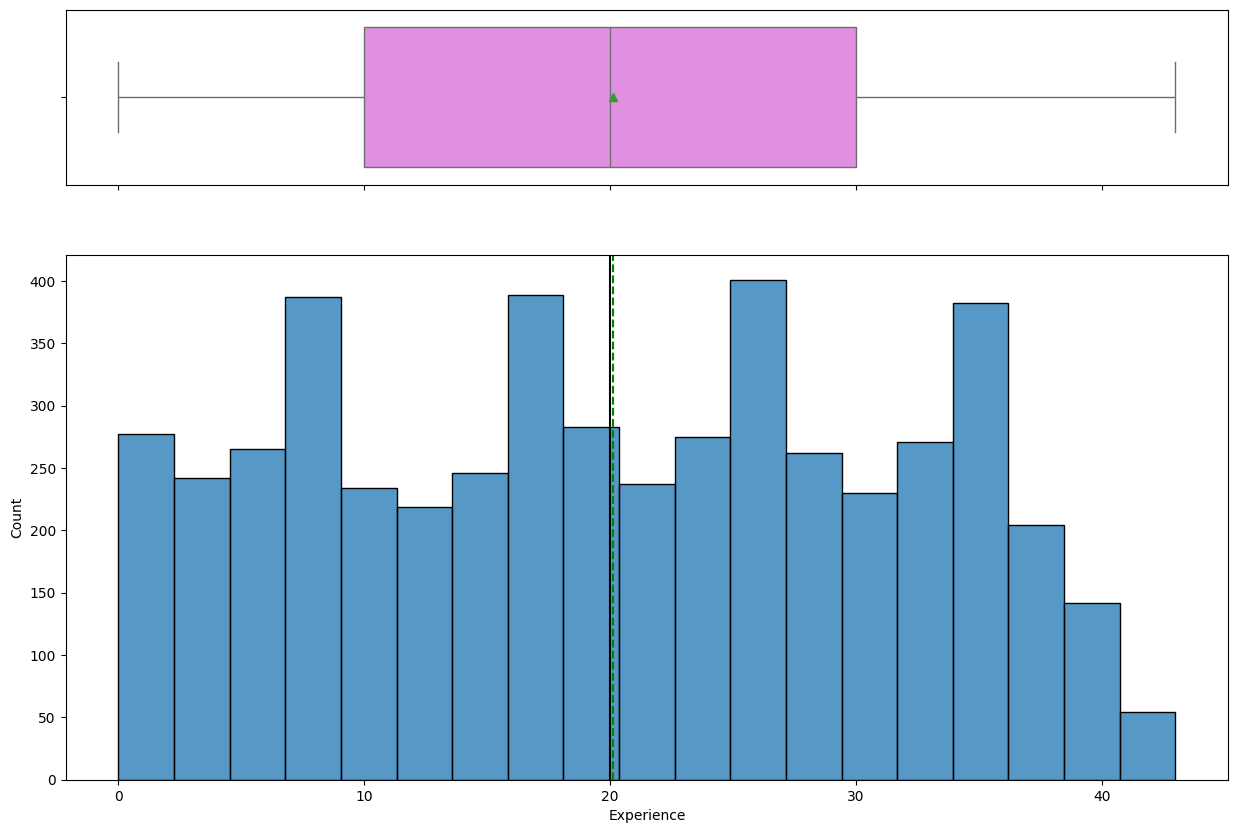

In [44]:
histogram_boxplot(data, "Experience")

*50% of the customers have more than 20 years experience
*There are no outliers

#### Observations on **Income**

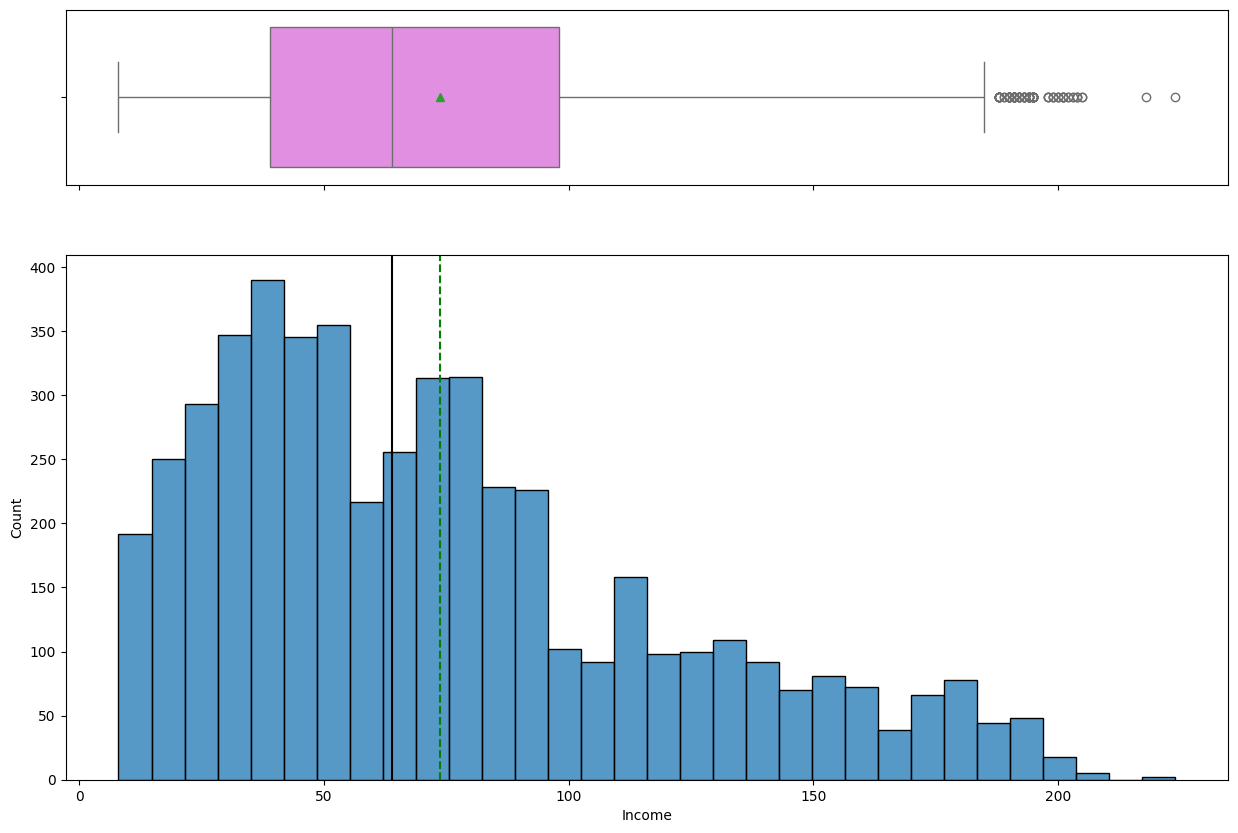

In [45]:
histogram_boxplot(data, "Income")

*The histogram is right skewed

*The are many outliers on the upper size with salaries higher than 200k usd

*There mean is 73k usd

#### Observations on **Family**

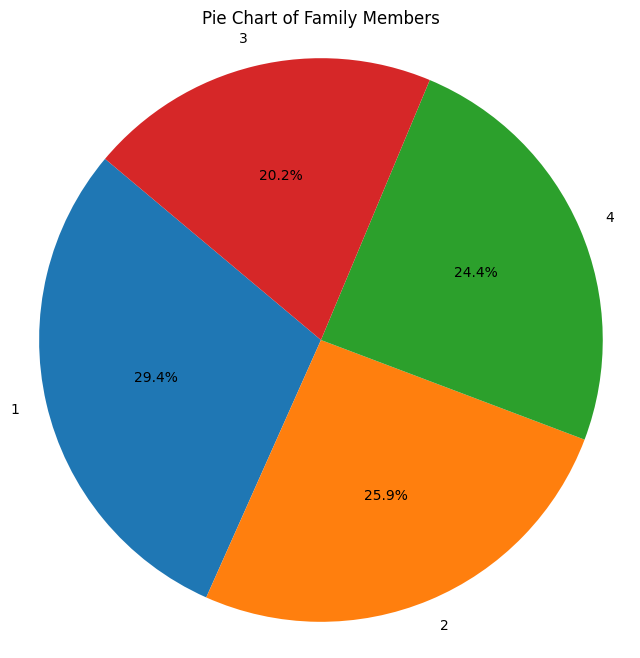

In [46]:
# Pie Chart for Family Members
family_counts = data['Family'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Family Members')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* Family size is well distributed between 1 to 4 children
* Neverthless, there are 29% of families with 3 kids being the largest group

Comments

#### Observations on Credit card average **spending**

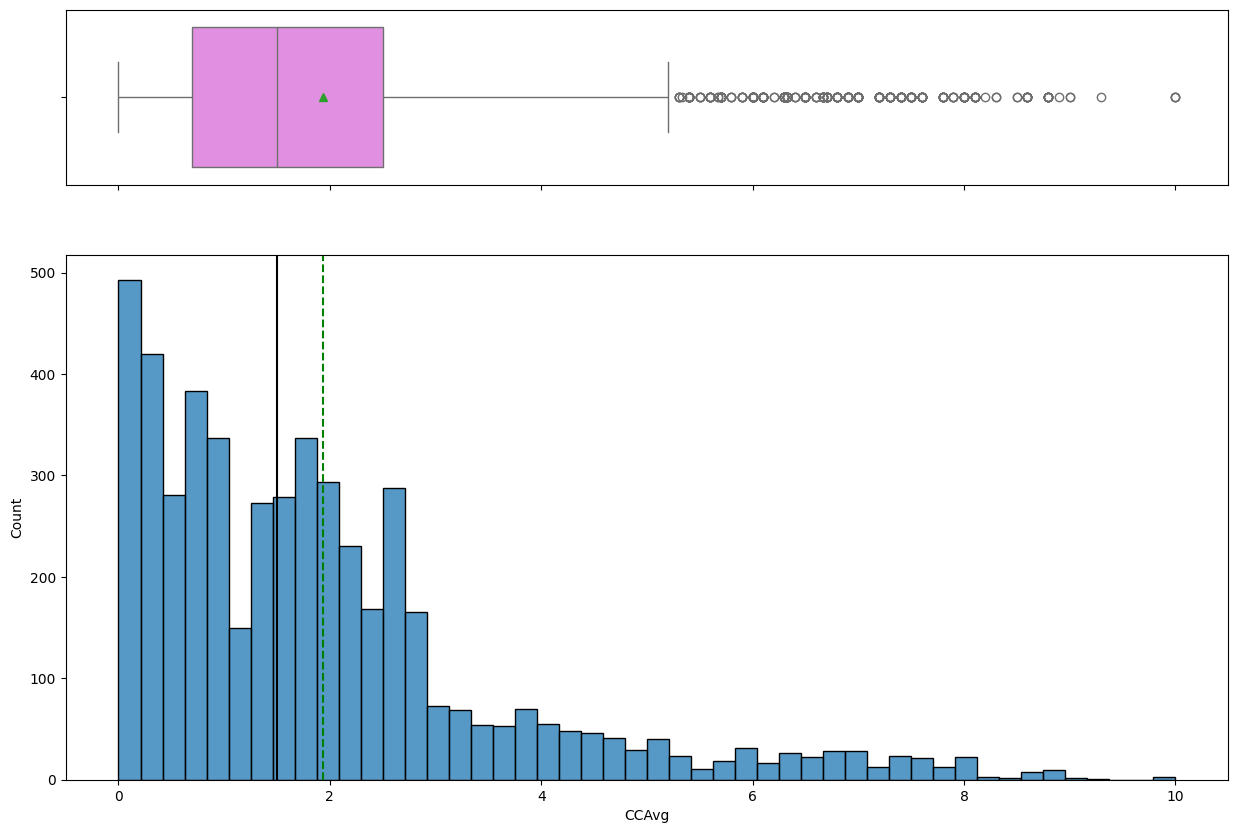

In [47]:
histogram_boxplot(data, "CCAvg")

* Avg Customer Credit card spending is highly right skewed
*There is a large number of outliers on the upper part with spending over 6k usd.
*Avg credit card spending is around 2k usd


#### Observations on **Education**

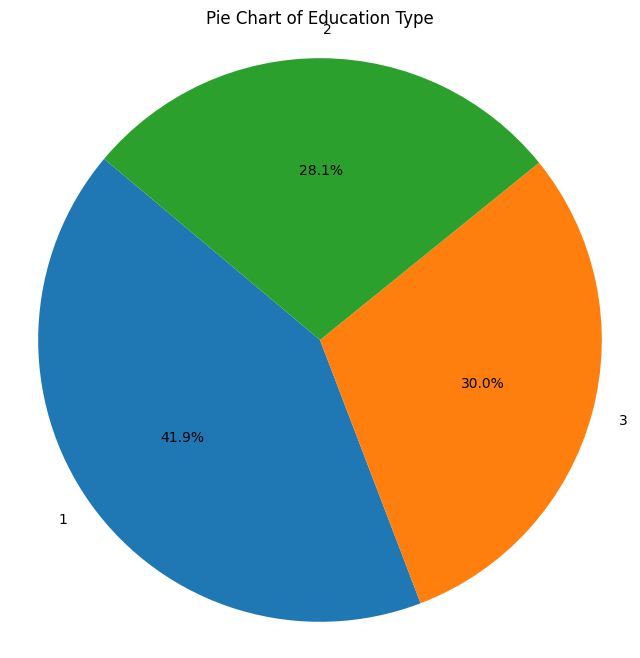

In [48]:
# Pie Chart for Education type
Education_type = data['Education'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Education_type, labels=Education_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Education Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


* 42% of customers are undegratuated
* The rest is almost evenly distributed between graduate and post

#### Observations in **Mortgage**

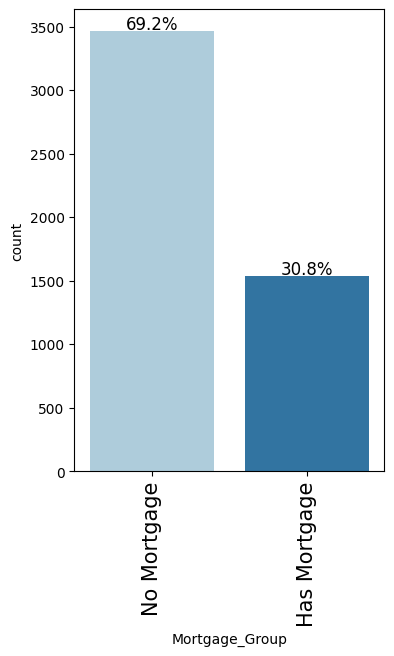

In [49]:
# Create a new column to group 'Mortgage' values
data['Mortgage_Group'] = data['Mortgage'].apply(lambda x: 'No Mortgage' if x == 0 else 'Has Mortgage')
# Create a bar plot
labeled_barplot(data, "Mortgage_Group", perc=True)

70% of customers don´t have a Mortgage

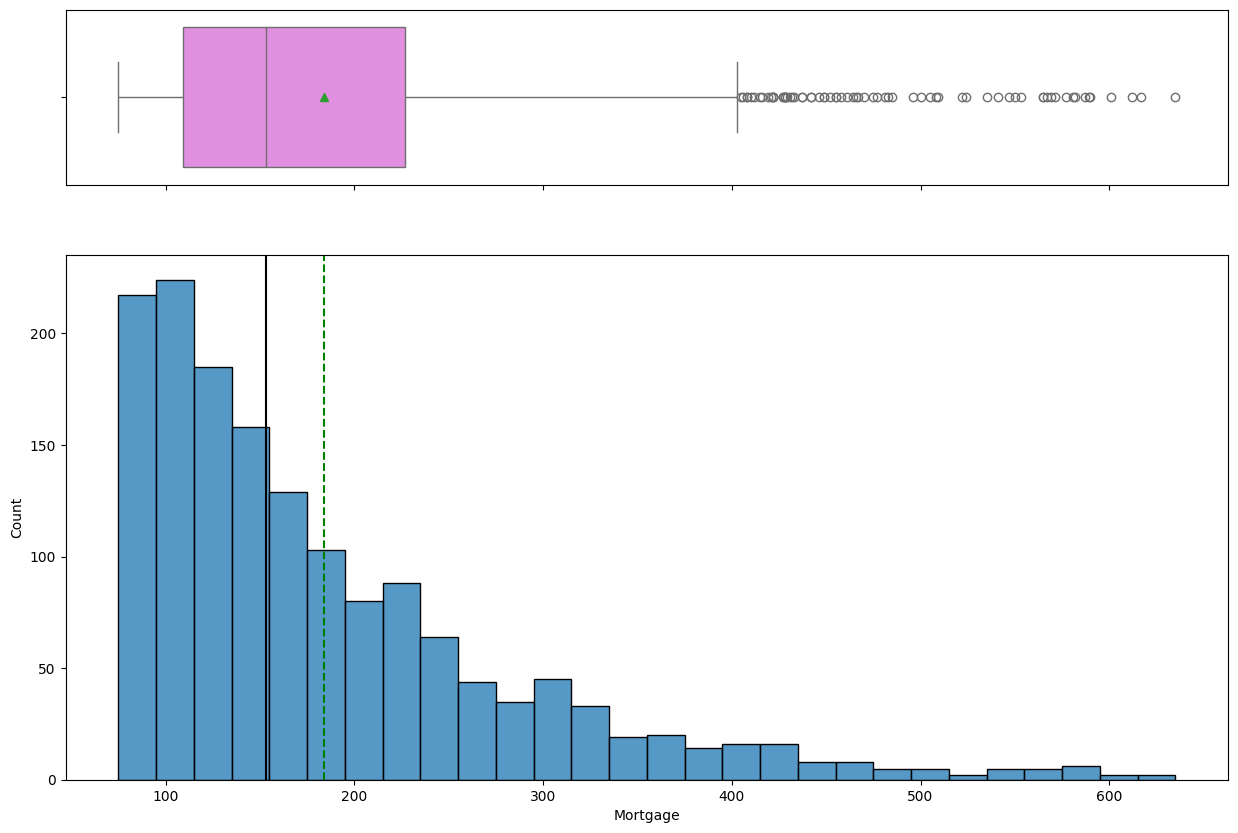

In [50]:
#Let´s analyze customer with a Mortagage and the average Mortgage
filtered_data = data[data["Mortgage"] > 0]
histogram_boxplot(filtered_data, "Mortgage")

* The data from customer with mortgage is right skewed
* Many outliers on the upper part, above 400k usd levels
* Highest mortgage is above 600k usd

#### Observations in **Personal** **Loan** **campaign**

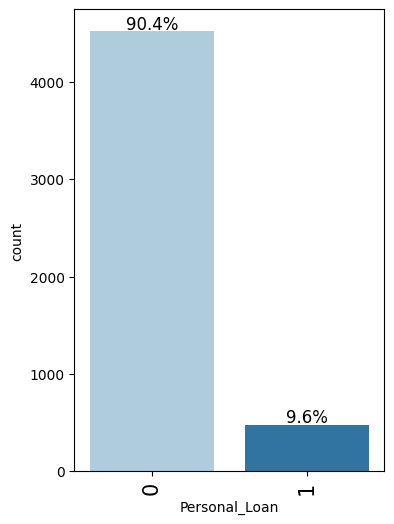

In [51]:
labeled_barplot(data, "Personal_Loan", perc=True)

* 90% of customers didn´t take the Personal Loan offer from the *bank*

#### Observations on Securities **account**

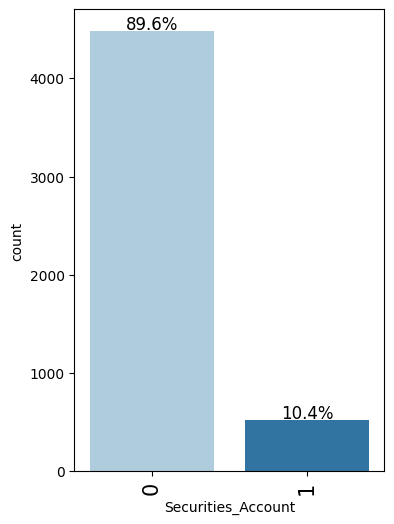

In [52]:
labeled_barplot (data, "Securities_Account", perc=True)

* Almost 90% of customers don´t have a security account with the bank

#### Observations on **CD_Account**

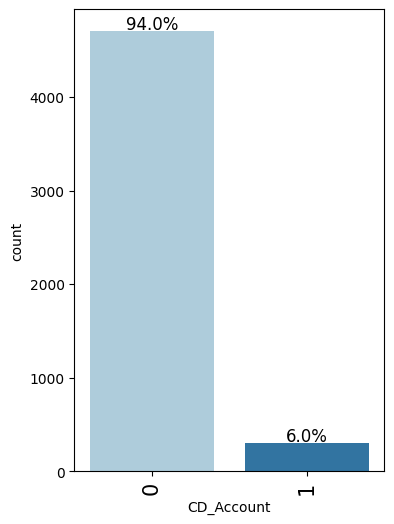

In [53]:
labeled_barplot(data, "CD_Account", perc=True)

* 94% of customers don´t have a deposit account with the bank

####Observations on Use of Online **channels**

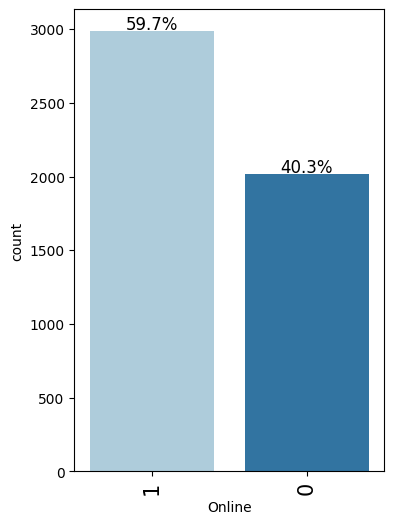

In [54]:
labeled_barplot (data, "Online", perc=True)


* Almost 60% of customers use the bank online channel

#### Observations on other **Credit** **card**

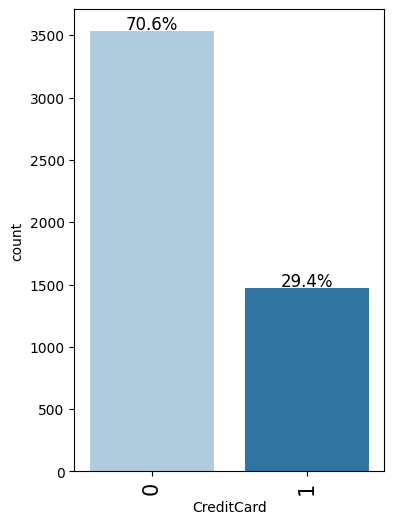

In [55]:
labeled_barplot(data, "CreditCard", perc=True)

* 70% of customers don´t use credit cards from other banks
* There is an opportunity to convert the credit cards from other banks (30%)

#### Observations on **Zipcode**

In [56]:
#Let´s use pgeocode libray to match ZIPCode with US addresses
!pip install pgeocode
import pgeocode
# Initialize the nominatim instance for the US
nomi = pgeocode.Nominatim('us')

# Function to get city name from ZIP code
def get_city(zip_code):
    location = nomi.query_postal_code(zip_code)
    return location.place_name

# Apply the function to the ZIPCode column
data['City'] = data['ZIPCode'].apply(get_city)

In [57]:
# Count the numbers of cities in the data
city_counts = data['City'].value_counts()
print(city_counts)


City
Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sausalito          1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Stinson Beach      1
Name: count, Length: 244, dtype: int64


* There are 244 cities
* LA, SD, SF, Berkeley and Sacramento are cities where most customer live

In [58]:
# Function to get state name from ZIP code
def get_state(zip_code):
    location = nomi.query_postal_code(zip_code)
    return location.state_code

# Apply the function to the ZIPCode column
data['State'] = data['ZIPCode'].apply(get_state)

# Count the unique states
state_counts = data['State'].value_counts().reset_index()
state_counts


,State,count
0,CA,4959


* All customers come from California state
* There are 41 ZIPCodes not recognize by the data base
* Clearly this is a regional CA Bank

All customers belong to California state

### Bivariate analysis

#### Correlation Map

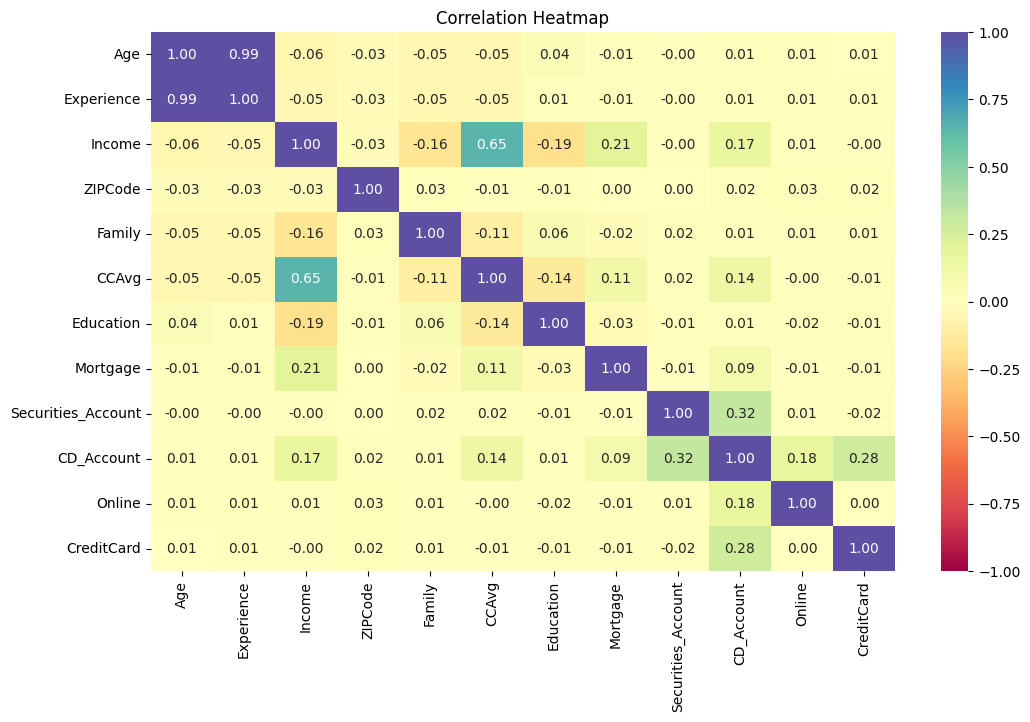

In [59]:
#Let´s check the correlation between independent variables
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Importing numpy

# Selecting numerical columns and removing the 'Personal_Loan' column
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Personal_Loan')  # 'Personal_Loan' is the target variable, we want to remove it in the correlation matrix

# Plotting the correlation heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.title('Correlation Heatmap')
plt.show()


* There is a strong positive correlation between Income level and credit card spending
* There is a slight positive correlation between Income level and Mortgage
* As expected Age and experience are strongly positive correlated
* There is a slight negative correlation between Income and education which is unusual
* There is also a slight negative correlation between Income and Family.
* There is a moderate positive correlation between having a security account and having a deposit account
* There is a moderate positive corelation between Having a credit card from other bank and having a deposit account with the bank

#### Personal loan acceptance versus **Age**

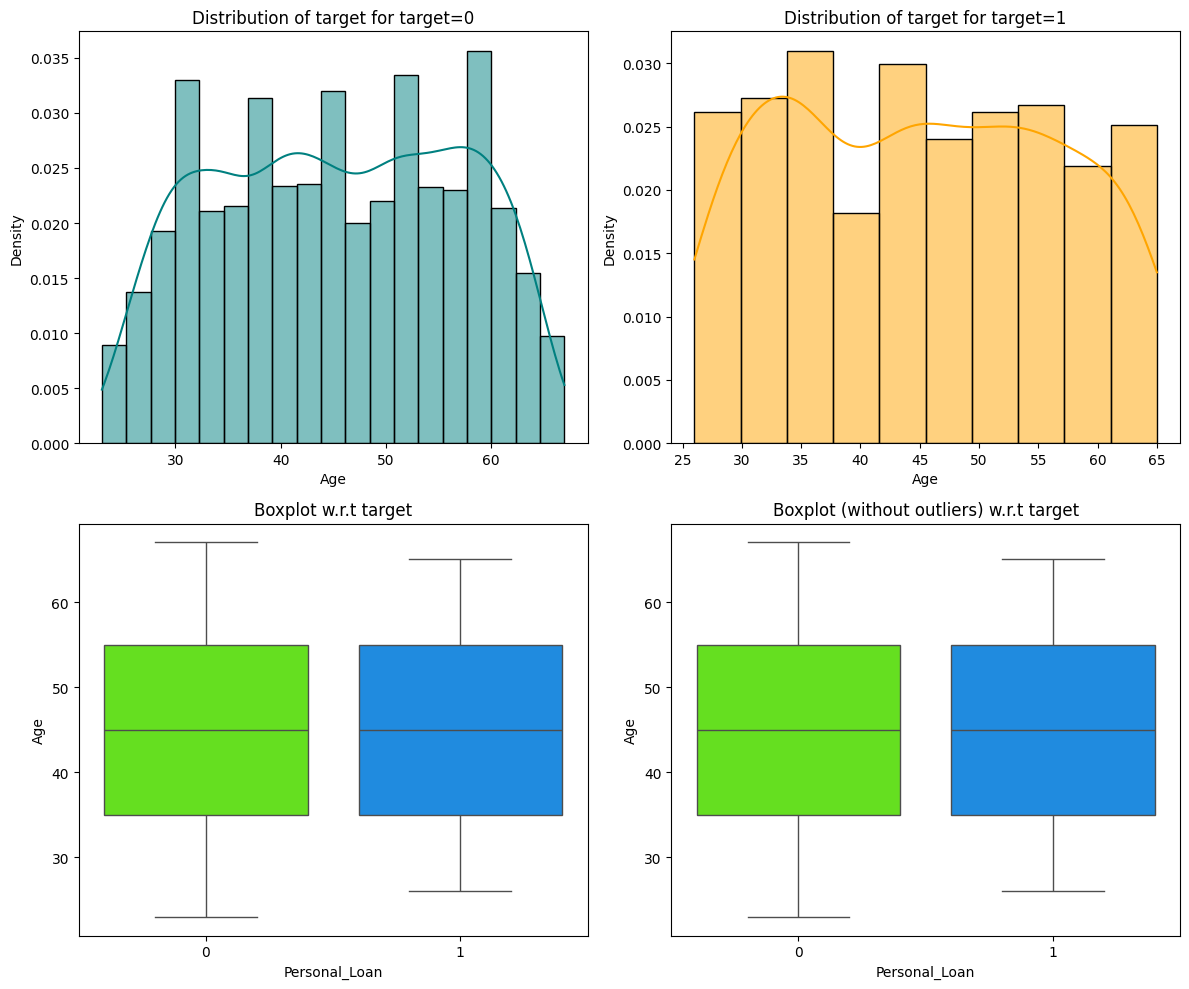

In [60]:
#Let´s check the distribution and boxplot of Personal loan acceptances and age
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Age for customer who accepted or not the offer seems not to be a factor (both groups show same average.
* Neverthless, for people who accepted the loan, there seems to be high interest in the 35, 45 and 65 age groups

#### Personal Loan acceptance versus **Experience**

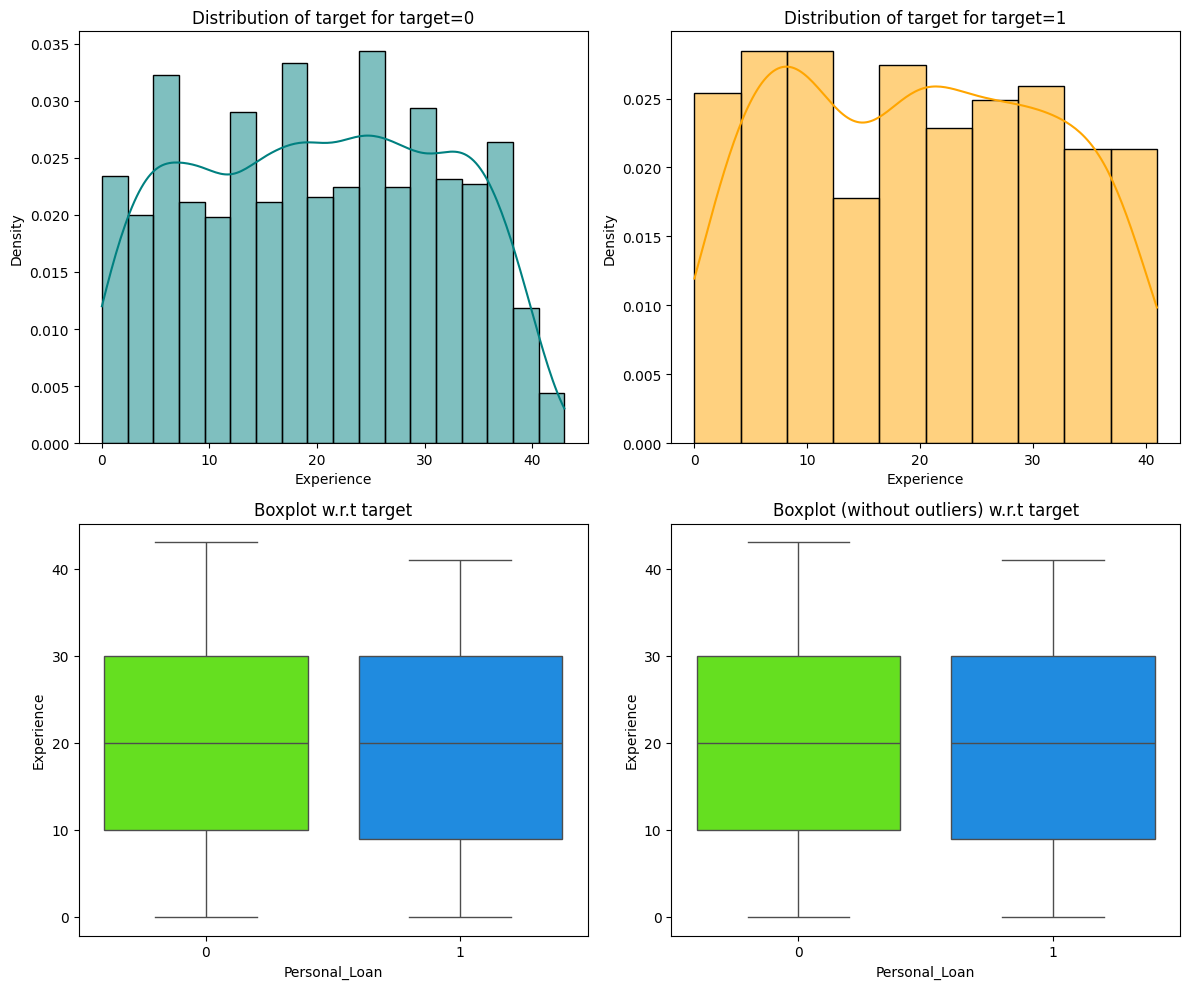

In [61]:
#Let´s check distribution and boxplot of Experience vesus Personal Loan
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* Similarly to age, years of experience doesn´t seems to be different between people who accepted or didn´t accept the loan
* Neverthless on the ones who accepted there seems to a concentration in people with 10 years, 20 and 30 years.

#### Personal loan vs **Income**

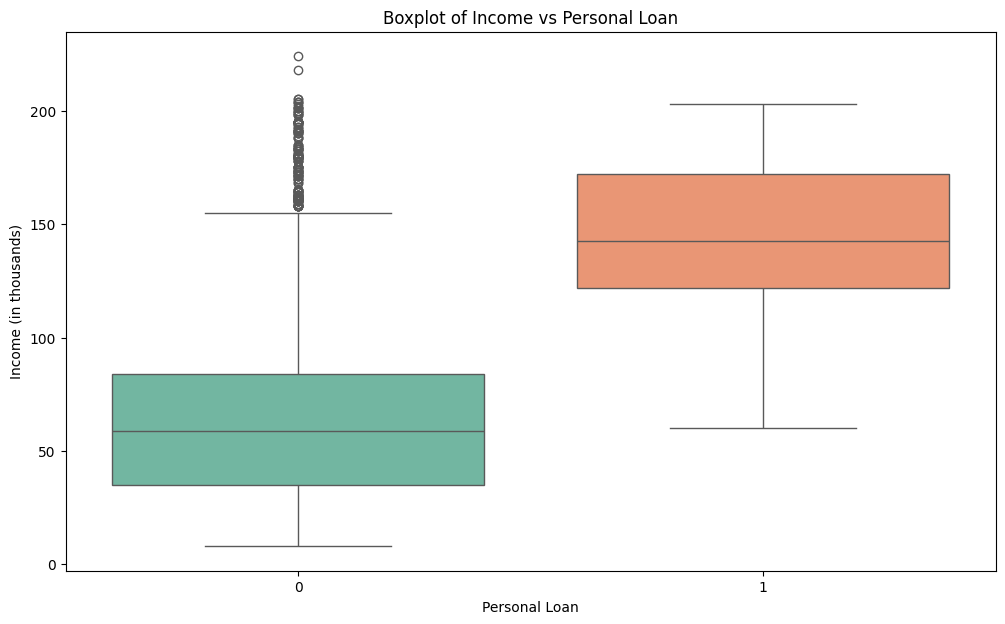

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Personal_Loan', y='Income', palette="Set2")
plt.title('Boxplot of Income vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Income (in thousands)')
plt.show()


* Interestingly, the people who accepted the loan offer have an average higher income (almost 3) than the ones who didn´t
* In the group that didn´t accept the loan, although they have an average lower salary (50K), there are many outliers on the upper part

#### Personal Loan acceptance versus **Family** **members**



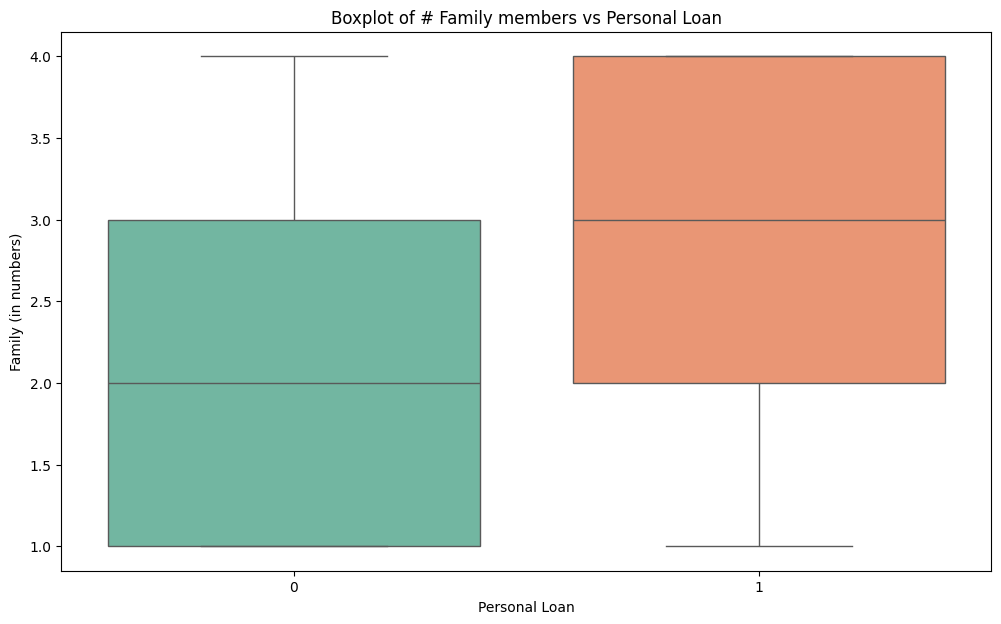

In [63]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Personal_Loan', y='Family', palette="Set2")
plt.title('Boxplot of # Family members vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Family (in numbers)')
plt.show()


* The customers who accepted the Loan campaign have more childrens in average (3), compared to only an average of 2 kids from customer who didn´t accept the Loan offering.

#### Personal Loan acceptance versus **Credit** **card** **spending**






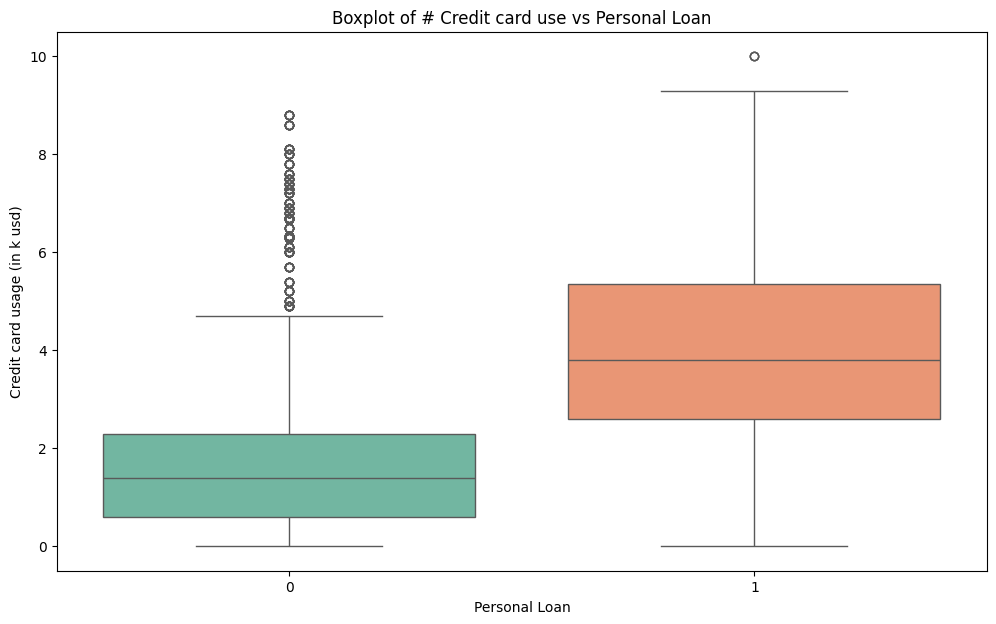

In [64]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Personal_Loan', y='CCAvg', palette="Set2")
plt.title('Boxplot of # Credit card use vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Credit card usage (in k usd)')
plt.show()


* Customer who accepted the Loan campaign have almost 4k usd on credit card spending which is more than two times the average from customers who didn´t accept it

#### Personal loan acceptance and **Education** **level**

Personal_Loan             0    1   All
Education_Level                       
All                    4520  480  5000
Advanced/Professional  1296  205  1501
Graduate               1221  182  1403
Undergrad              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


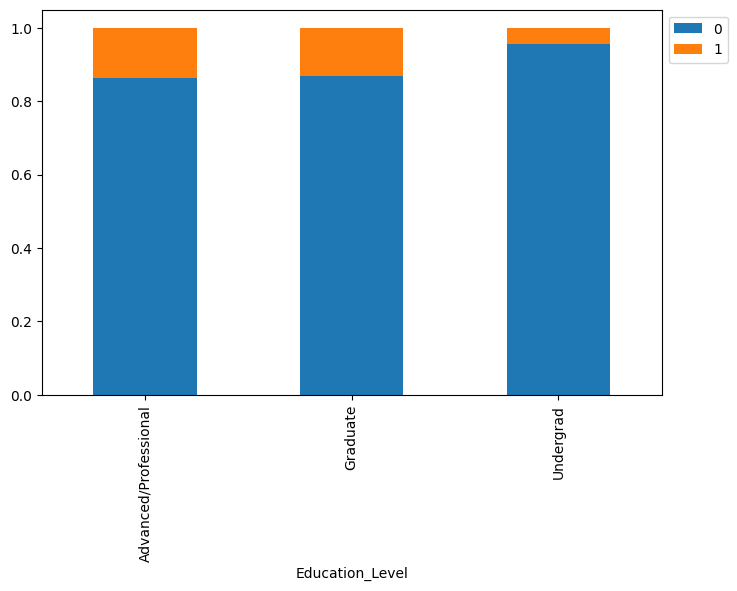

In [65]:
# Mapping the numeric values to their corresponding education levels
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
data['Education_Level'] = data['Education'].map(education_mapping)
stacked_barplot(data, 'Education_Level', 'Personal_Loan')


* The loan campaign was more effectve with Advanced/Profesionals than undergraduates which is the education segment with lowest acceptance of the offer.

#### Personal loan acceptance versus **Mortgage** **value**




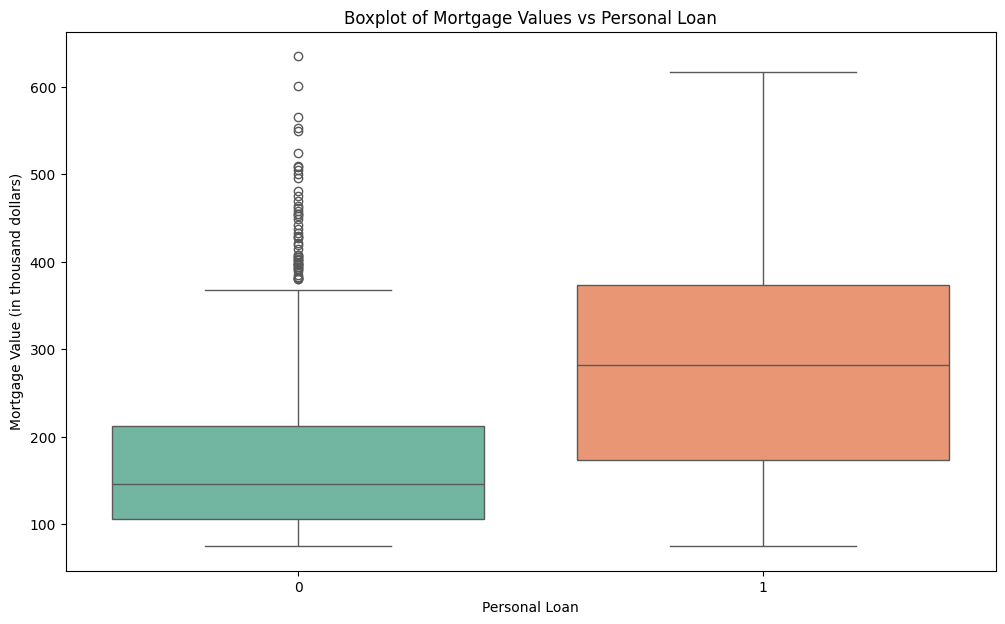

In [66]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_data, x='Personal_Loan', y='Mortgage', palette="Set2")
plt.title('Boxplot of Mortgage Values vs Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage Value (in thousand dollars)')
plt.show()


* Customer who took the Loan offering have a higher average mortgage compared to the ones who didn´t take the offer. The average mortagage for customer who took the offer is almost 300k, while for customer who didnt accept the loan is around 150k.

#### Personal Loan acceptance versus owning a **security** **account**

Personal_Loan        0    1   All
Security_account                 
All               4520  480  5000
No                4058  420  4478
Yes                462   60   522
------------------------------------------------------------------------------------------------------------------------


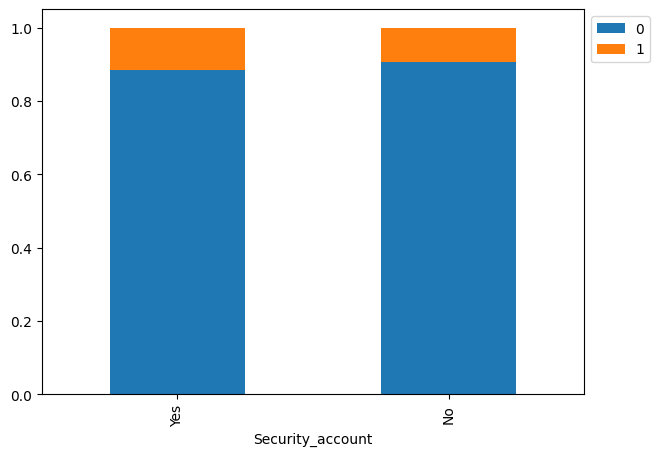

In [67]:
# Mapping the Yes or No labels
Security_mapping = {0: 'No', 1: 'Yes'}
data['Security_account'] = data['Securities_Account'].map(Security_mapping)
stacked_barplot(data, 'Security_account', 'Personal_Loan')



* Customers with a security account with the bank have a higher rate of Personal Loan accepted to almost 15%, compared to 10% from customer who didn´t accept the offer.

#### Personal Loan acceptance versus CD **account** **ownership**

Personal_Loan       0    1   All
CD_accountowner                 
All              4520  480  5000
No               4358  340  4698
Yes               162  140   302
------------------------------------------------------------------------------------------------------------------------


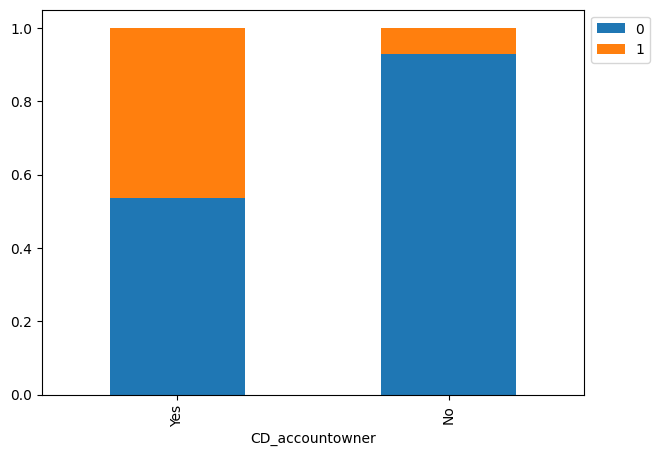

In [68]:
# Mapping the Yes or No labels
CD_mapping = {0: 'No', 1: 'Yes'}
data['CD_accountowner'] = data['CD_Account'].map(CD_mapping)
stacked_barplot(data, 'CD_accountowner', 'Personal_Loan')



* 45% of Customer with a deposit account with the bank took the personal loan offering according to the dataset.
* less than 9% of Customer with no deposit account accepted the personal loan offering

#### Personal loan acceptance versus **Digital** **channel** **use**

Personal_Loan          0    1   All
Digitalchannel_use                 
All                 4520  480  5000
Yes                 2693  291  2984
No                  1827  189  2016
------------------------------------------------------------------------------------------------------------------------


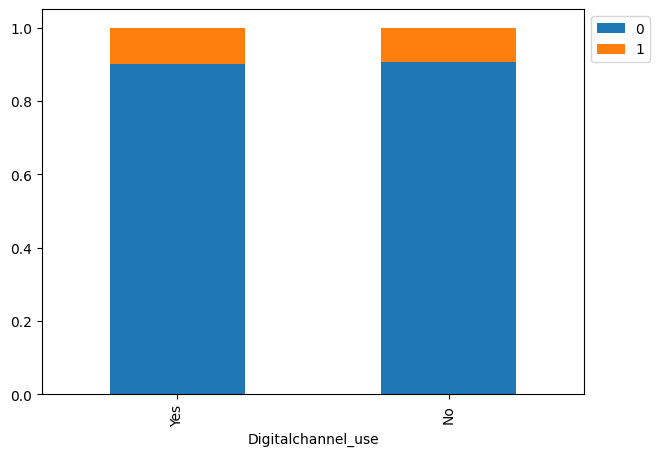

In [69]:
# Mapping the Yes or No labels
Digitalchannel_mapping = {0: 'No', 1: 'Yes'}
data['Digitalchannel_use'] = data['Online'].map(Digitalchannel_mapping)
stacked_barplot(data, 'Digitalchannel_use', 'Personal_Loan')



* There is no major statistical difference between customer who use online channels and the acceptance of the personal loan

#### Personal Loan acceptance versus **Credit** **card** **ownership** from other bank



Personal_Loan        0    1   All
Other_CreditCard                 
All               4520  480  5000
No                3193  337  3530
Yes               1327  143  1470
------------------------------------------------------------------------------------------------------------------------


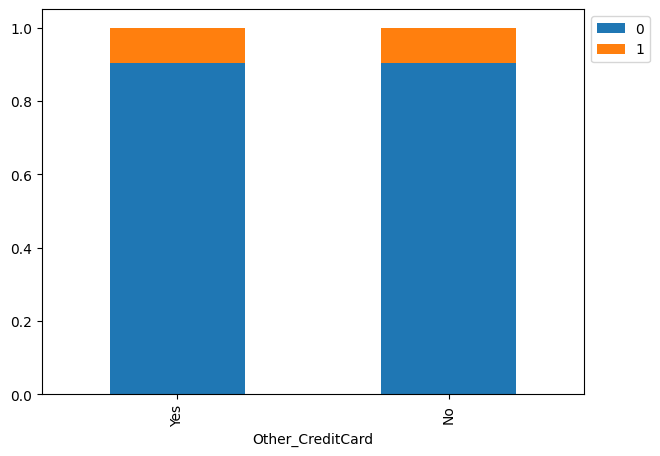

In [70]:
# Mapping the Yes or No labels
CreditCard_mapping = {0: 'No', 1: 'Yes'}
data['Other_CreditCard'] = data['CreditCard'].map(CreditCard_mapping)
stacked_barplot(data, 'Other_CreditCard', 'Personal_Loan')



* There is no much different between customer with a credit from another bank and their acceptance of the personal loan.

#### Income level and **Education** **level**

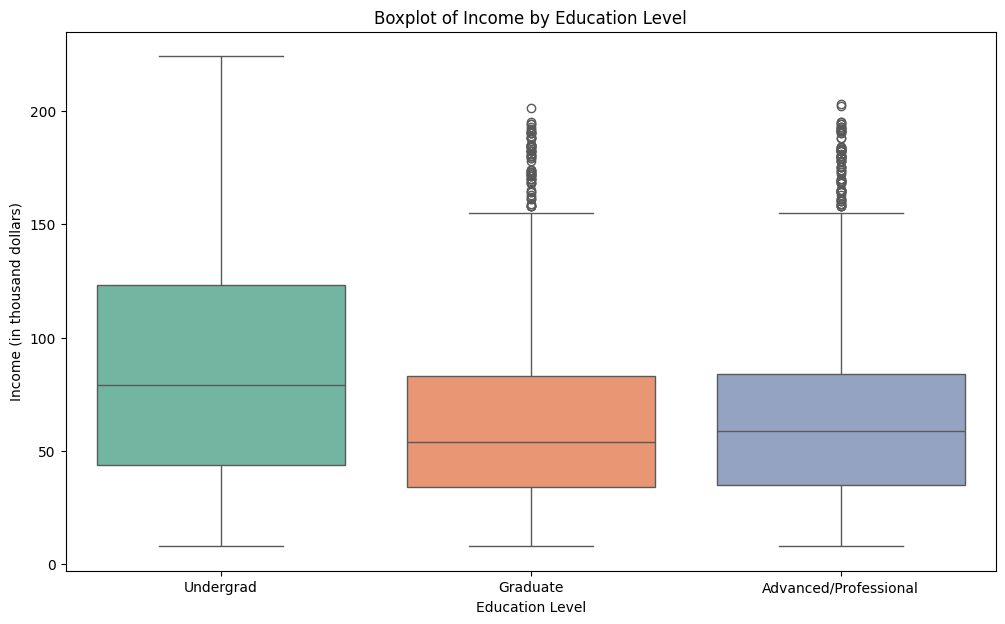

In [71]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Education', y='Income', palette="Set2")
plt.title('Boxplot of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income (in thousand dollars)')
plt.xticks(ticks=[0, 1, 2], labels=['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.show()


* Surprisingly, undegraduate customer show a higher salary than more educated customers, altough graduate and advanced/profesional have a number of outliers on the upper part

#### Credit Card spending versus Income


CreditCard       0     1   All
Income_Group                  
All           3530  1470  5000
0-50          1304   565  1869
50-100        1363   546  1909
100-150        545   224   769
150-200        305   129   434
200-250         13     6    19
------------------------------------------------------------------------------------------------------------------------


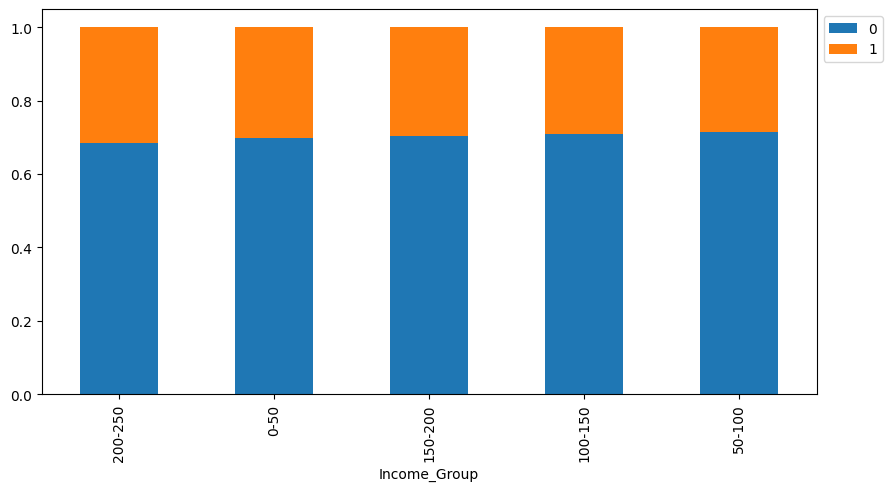

In [72]:
# Define the bins for income ranges
income_bins = [0, 50, 100, 150, 200, 250, 300]
income_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']

# Create a new column in the dataframe for the income groups
data['Income_Group'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, right=False)

# Plot the stacked bar plot
stacked_barplot(data, 'Income_Group', 'CreditCard')


* Having a credit card from another bank, doesn´t seems to be affected by income levels, as all ranges show similar adoption of the loan offering.

#### Distribution analysis Income and Personal Loan offering



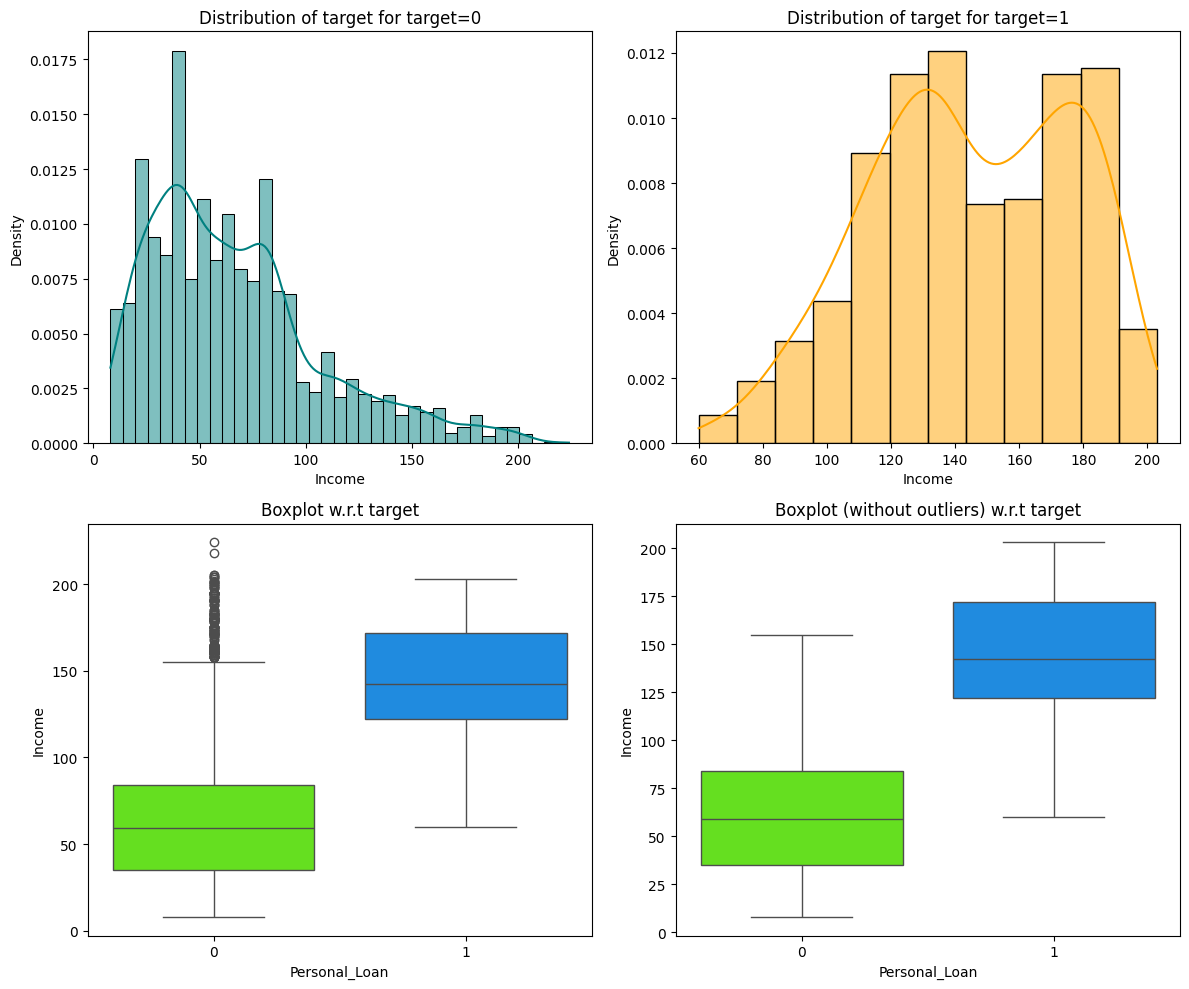

In [73]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Clearly, high income customers have more interest on a Personal loan offering

### Additional Questions:



#### 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?


* The histogram might show that 70% of customers with zero mortgage values.
 * The boxplot highlight the presence of outliers in the higher mortgage values.

#### 2. How many customers have credit cards?


* Since we don´t have this information for the bank, we will assume that all customers with Zero spending on credit card don´t have a credit card.

In [74]:
# Count the number of customers with CCAvg = 0
zero_ccavg_data = data[data['CCAvg'] == 0].shape[0]

# Total number of customers
total_customers = data.shape[0]

# Calculate the percentage of customers with CCAvg = 0
percentage_zero_ccavg = (zero_ccavg_data / total_customers) * 100

print(f"Number of customers with CCAvg = 0: {zero_ccavg_data}")
print(f"Total number of customers: {total_customers}")
print(f"Percentage of customers with CCAvg = 0: {percentage_zero_ccavg:.2f}%")


Number of customers with CCAvg = 0: 106
Total number of customers: 5000
Percentage of customers with CCAvg = 0: 2.12%


* Based on this data 98% of customers or 4894 use credit card and therefore are owners. There are 106 customers with no credit card spending which can be considered No credit card owners. but let´s check if out of this 106 customers with 0 balance, do they have a credit card with another bank?

In [75]:
# Count the number of customers with CCAvg = 0 who have a credit card with other banks
zero_ccavg_data = data[data['CCAvg'] == 0] # Create the subset of data
zero_ccavg_with_creditcard = zero_ccavg_data[zero_ccavg_data['CreditCard'] == 1].shape[0]
print(f"Number of customers with CCAvg = 0 who have a credit card with other banks: {zero_ccavg_with_creditcard}")

Number of customers with CCAvg = 0 who have a credit card with other banks: 28


Therefore if we add customer with credit card spending and customer who have a credit card with other bank we have 4922

#### 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?


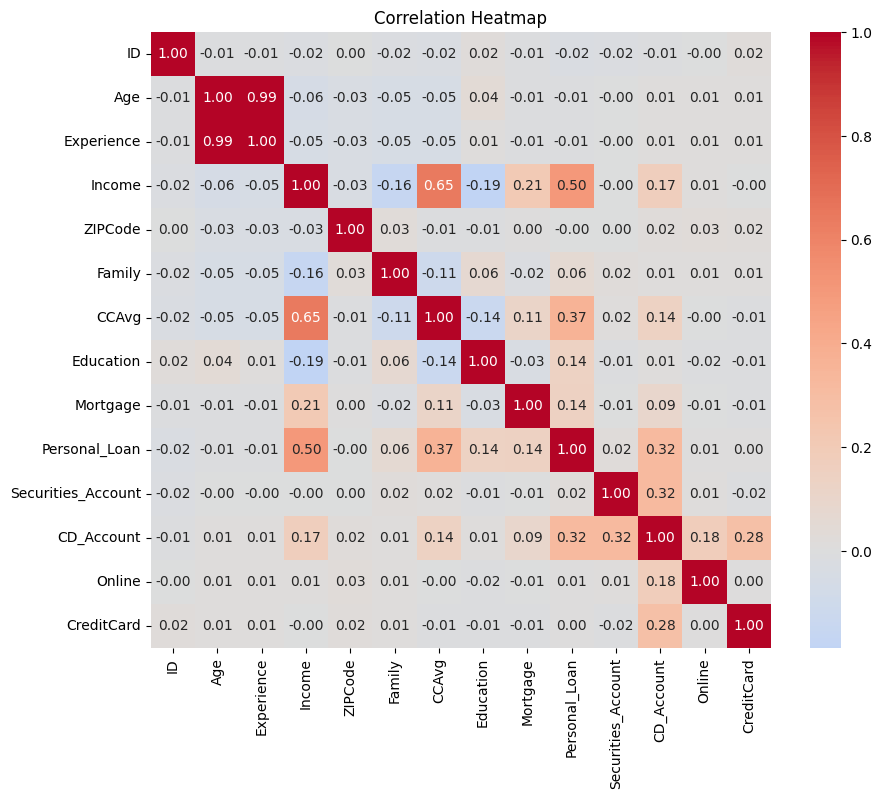

In [78]:
# Let´s Calculate the correlation matrix

# Let´s load the dataset again as we added some columns
import pandas as pd # Importing Pandas library
df_main = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")
data = df_main.copy()
correlation_matrix = data.corr()

# Let´s Get the correlations with Personal_Loan
correlation_with_personal_loan = correlation_matrix["Personal_Loan"].sort_values(ascending=False)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

* Personal Loan has_


1.   A strong positive correlation with Income
2.   A slight strong positive correlation with credit card spending
3.   A Moderate positive correlation with having a deposit account
4.   A weak positive correlation with Education and Mortgage




#### 4. How does a customer's interest in purchasing a loan vary with their age?

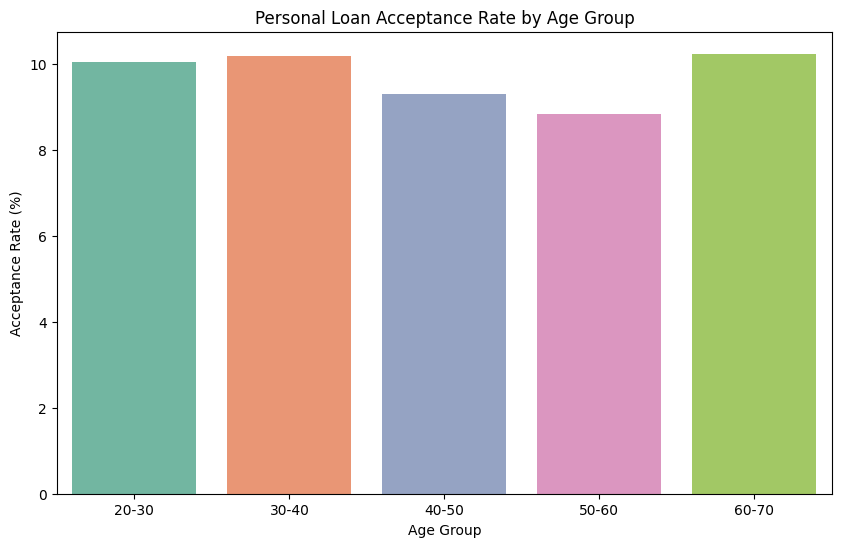

In [81]:
# Let´s compare by creating age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the acceptance rate for each age group
age_group_acceptance = data.groupby('Age_Group')['Personal_Loan'].mean() * 100

# Plot the acceptance rate for each age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_acceptance.index, y=age_group_acceptance.values, palette="Set2")
plt.title('Personal Loan Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate (%)')
plt.show()


* There seems to be a slighty higher acceptance rate for loan for customers between 30-40 years old and customers between 60-70 years old.
* Customer between 50-60 have the lower acceptance rate

#### 5. How does a customer's interest in purchasing a loan vary with their education?


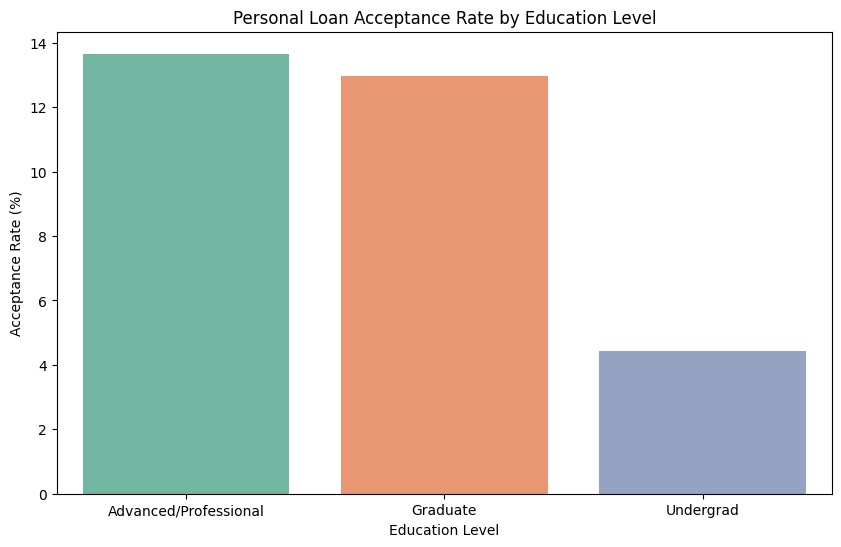

In [82]:
# Mapping the numeric values to their corresponding education levels
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
data['Education_Level'] = data['Education'].map(education_mapping)
# Calculate the acceptance rate for each education level
education_acceptance = data.groupby('Education_Level')['Personal_Loan'].mean() * 100
# Plot the acceptance rate for each education level
plt.figure(figsize=(10, 6))
sns.barplot(x=education_acceptance.index, y=education_acceptance.values, palette="Set2")
plt.title("Personal Loan Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Acceptance Rate (%)")
plt.show()



* The higher acceptance for loan offering happens in Advanced/profesionals with almost 14%, followed by graduate level with 13%.
* Undergraduate showed a much lower acceptance rate of around 4%

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Load the original df to make the Data processing

Since we did many changes during EDA, let´s load the original data to start the preprocessing

In [83]:
# Load the data
df_main = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")
# Copy data to another variable to avoid any changes to original data
data = df_main.copy()


### Outlier detection

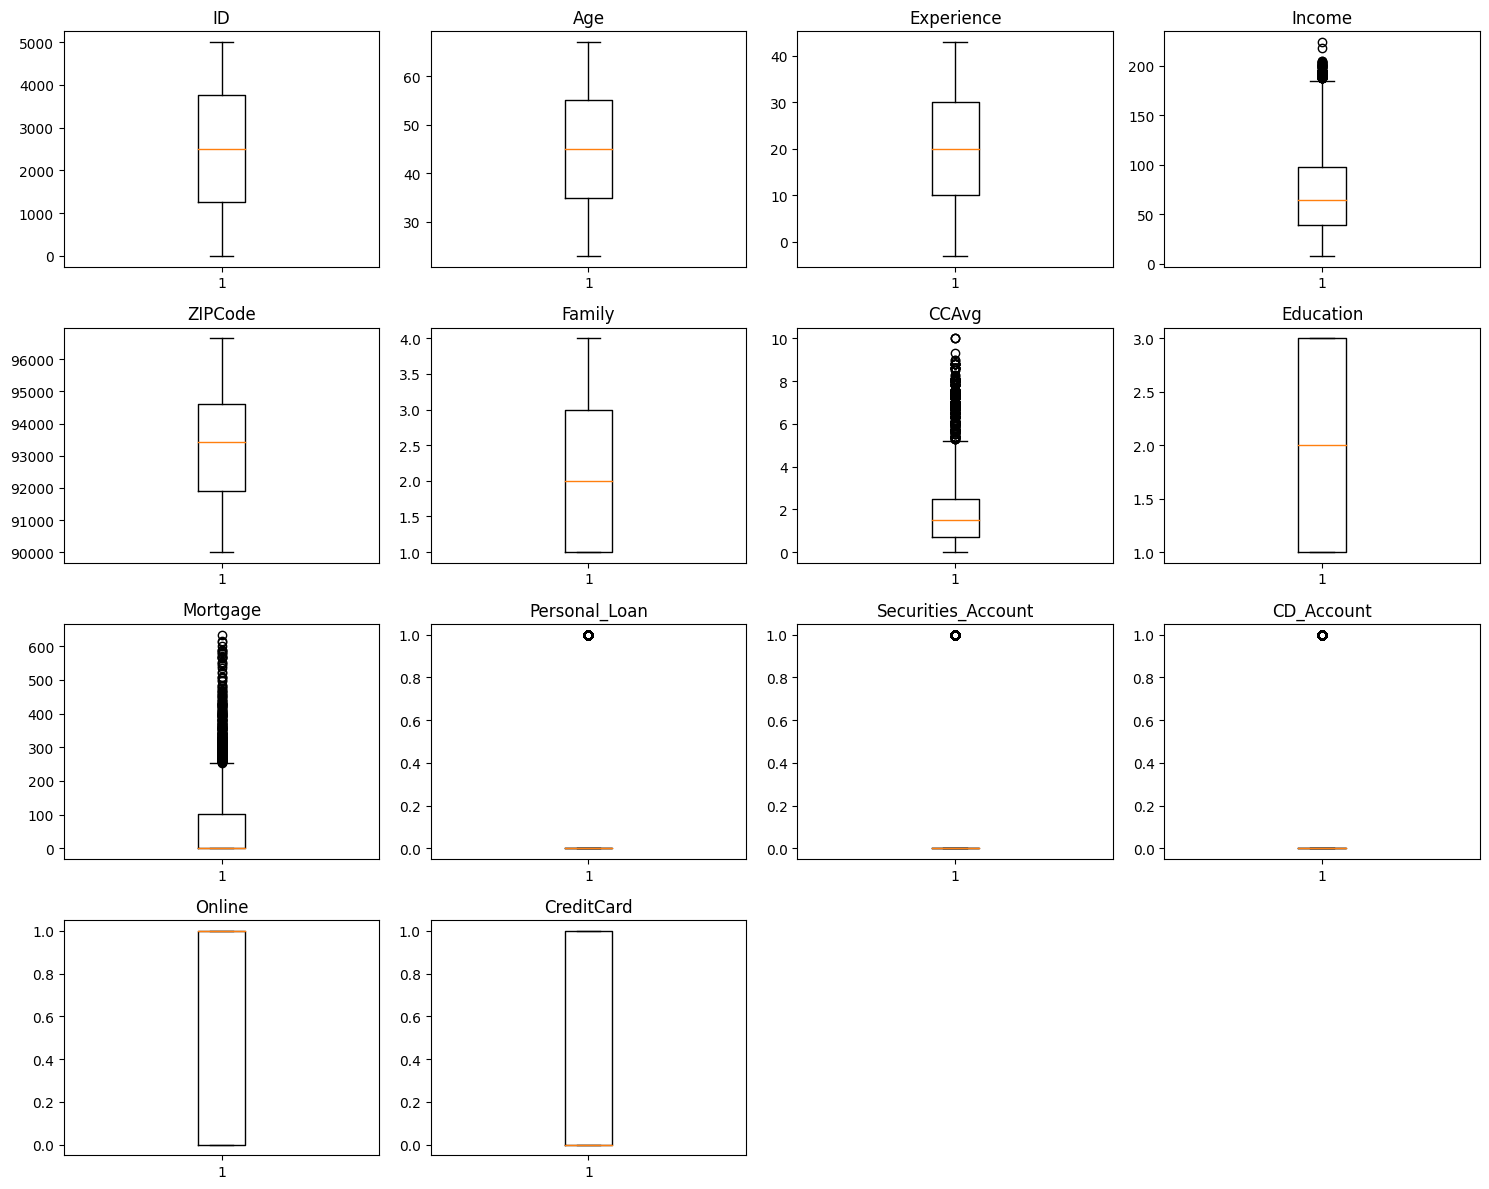

In [84]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* credit card spending, Income and Mortagage size shows outliers on the upper part of the graph. This probably related to very rich customer cases

### Drop Zipcode and ID
Since all sales are from California and ID doesn´t add any value

In [85]:
# Dropping the ID and ZIPCode columns
data.drop(["ZIPCode", "ID"], axis=1, inplace=True)


### Fix Negative Experience years

In [86]:
# Impute negative experience values with zero as we assume younger customers don´t have much experience based on the data (As 25 are mean 0 too)
data.loc[data['Experience'] < 0, 'Experience'] = 0

### Separate variables and create dummies

In [87]:
# Separate the target variable
X = data.drop(columns=["Personal_Loan"])
y = data["Personal_Loan"]

# Perform one-hot encoding on the categorical variables
X = pd.get_dummies(X, columns=['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'], drop_first=True)

# Display the first few rows to verify
X.head()


,Age,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49,4,1.6,0,False,False,True,False,False,False
1,45,19,34,3,1.5,0,False,False,True,False,False,False
2,39,15,11,1,1.0,0,False,False,False,False,False,False
3,35,9,100,1,2.7,0,True,False,False,False,False,False
4,35,8,45,4,1.0,0,True,False,False,False,False,True


### Creating Train and Test Datasets

In [88]:
# Let´s create Train and Test datasets. We will use 40% of data as the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Let´s Analyze our train and test datasets

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3000, 12)
Shape of test set :  (2000, 12)
Percentage of classes in training set:
Personal_Loan
0    0.904333
1    0.095667
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.9035
1    0.0965
Name: proportion, dtype: float64


## Model Building

### Decision tree model building with weighted parameters
Due to the frequency imbalance in Personal Loan answers we will use a weighted balance

In [89]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced") #balanced for class weight
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

### Model evaluation criterion


**Model can make wrong predictions as:**

1. Predicting a customer will take the Loan campaign but in reality the customer is not interested.

2. Predicting a customer will not take the Loan Campaign but in reality the customer would be interested to take it


**Which case is more important?**

* If we predict a customer interested ina Loan as a NOT interested customer, the bank would lose an opportunity of providing loan to a potential customer.

**How to reduce this loss i.e need to reduce False Negatives?**
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [90]:
# Let´s define a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [91]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training data

In [92]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


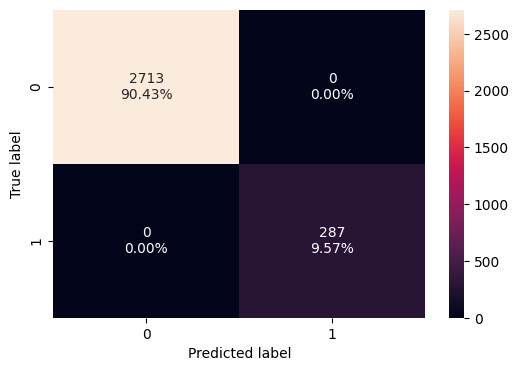

In [93]:
confusion_matrix_sklearn(model, X_train, y_train)

* The weighted model shows a perfect fit with the train data, which is most likely overfiting issue as it may not be able generalize data

### Checking model peformance on test data


In [94]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.9795,0.865285,0.917582,0.890667


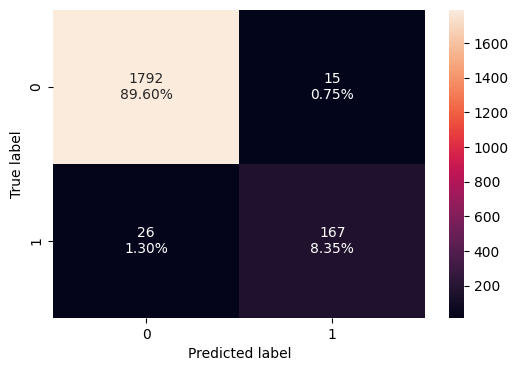

In [95]:
confusion_matrix_sklearn(model, X_test, y_test)

* Although the model performs well on accuracy (97%), the recall rate is much lower (86%). Probably due to the complexity is the current model doesn´t perform well on generalized data

## Model Performance Improvement

### Decision Tree (Pre-pruning)

There is large disparity between Train data and Test data performance. In order to improve performance on Test data and avoid overfitting we will perform pre-prunning




#### Using GridSearch for Hyperparameter tuning of our tree model


* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.



In [96]:
# Choose the type of classifier. We choose balance to manage class imbalance
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from

parameters = {
    "max_depth": [3, 5, 7, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_impurity_decrease": [0.0, 0.0001, 0.001],
}


# Type of scoring used to compare parameter combinations.We prioritize Recall
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

#### Checking Pre-Prunig peformance on train dataset[link text](https://)

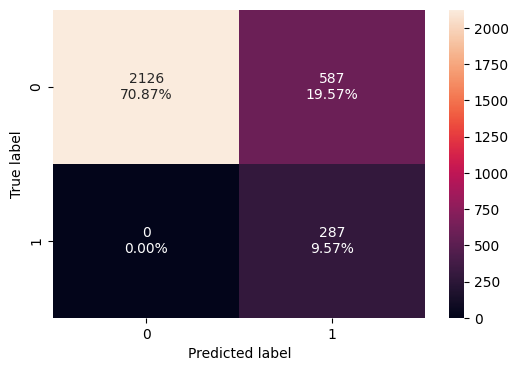

In [97]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [98]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.804333,1.0,0.328375,0.494401


* The accuracy and precision has been reduced from 1, which probably shows that the model is better generalizing in a more simplier model

#### Checking peformance on Test dataset


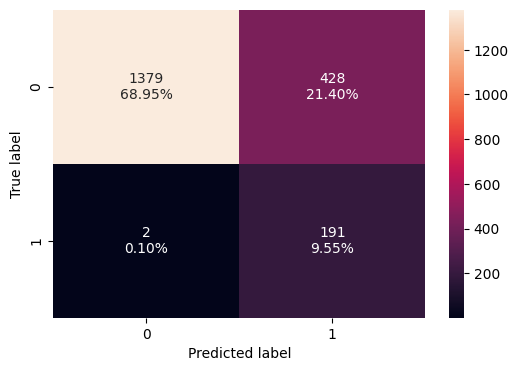

In [99]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [100]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.785,0.989637,0.308562,0.470443


* We have increase the recall to 98.9% as we are prioritizing this feature. Accuracy and Precision has been reduced.

#### Decision tree feature importance ( Pre-Pruning)

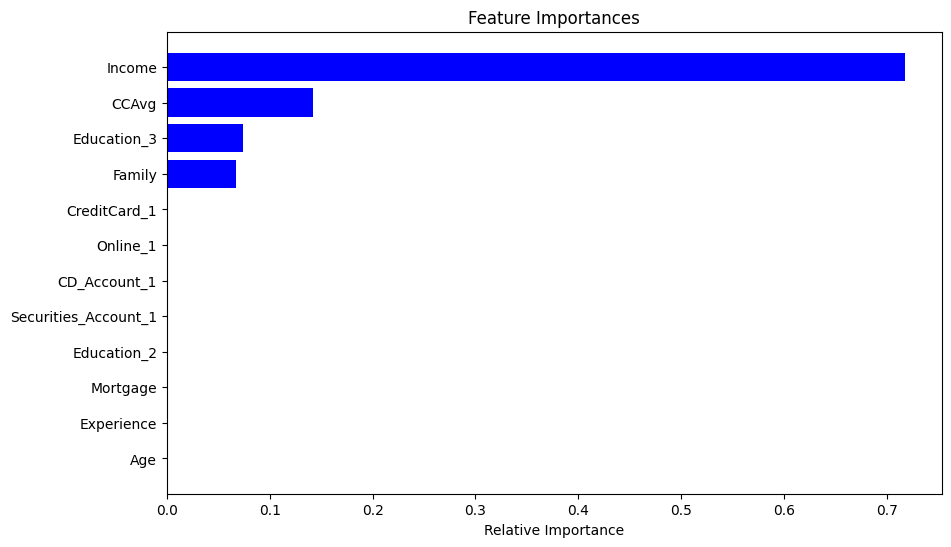

In [101]:
# Extract the feature names
feature_names = list(X_train.columns)

# Get the feature importances from the trained model
importances = estimator.feature_importances_

# Sort the indices of the features in ascending order of their importances
indices = np.argsort(importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


* For predicting Personal Loan offer acceptance the main atrributes are Income, Credit card spending, Family and education.
* Neverthless, Income has the highest importance as predictor

####Decision tree visualization (Pre-Pruning)



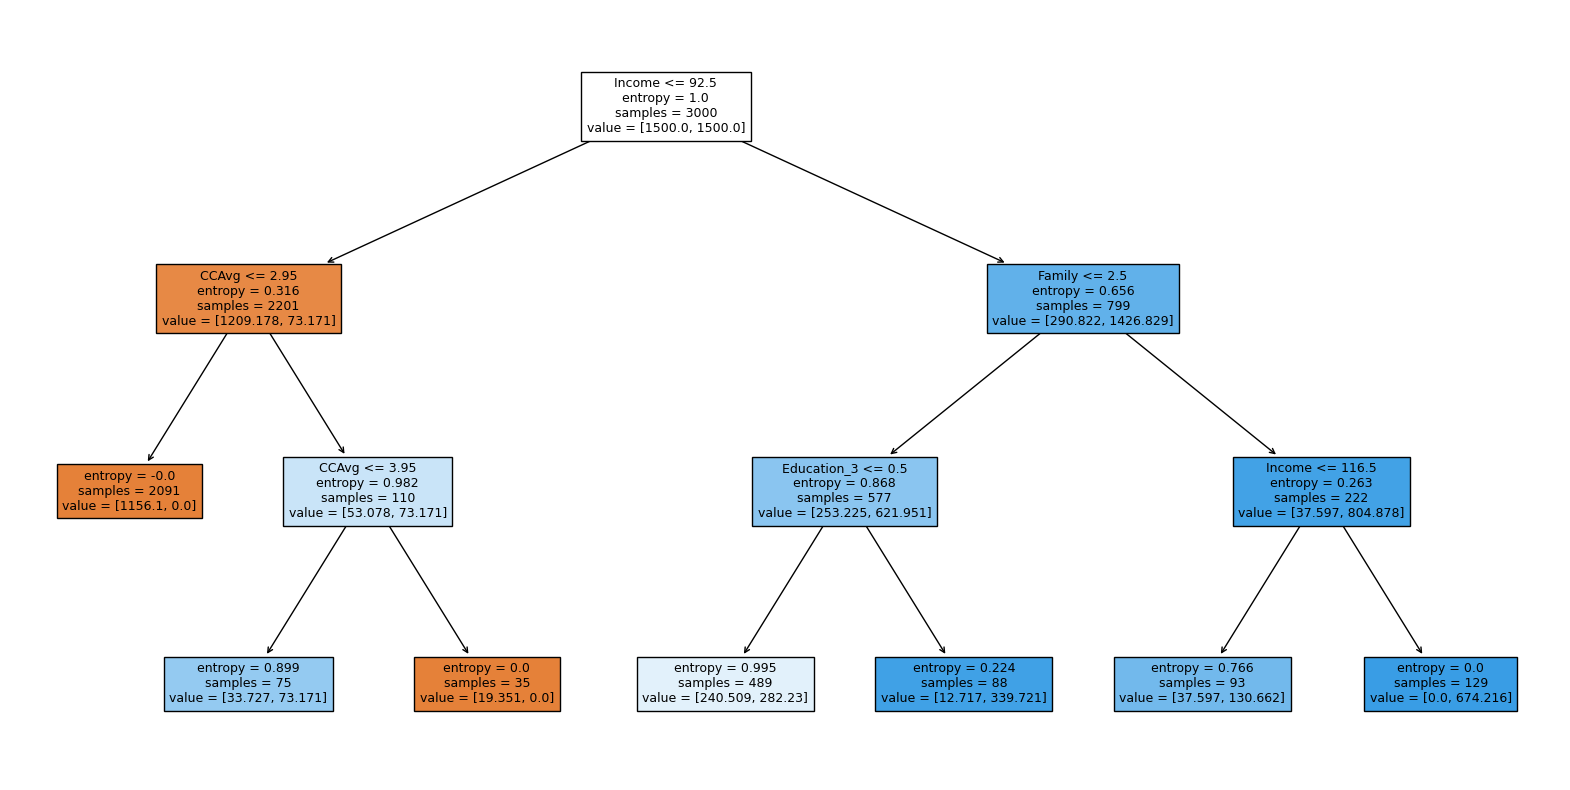

In [102]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


#### Decision tree rules in text (Pre-Pruning)

In [103]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1156.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 3.95
|   |   |   |--- weights: [33.73, 73.17] class: 1
|   |   |--- CCAvg >  3.95
|   |   |   |--- weights: [19.35, 0.00] class: 0
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- weights: [240.51, 282.23] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [12.72, 339.72] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [37.60, 130.66] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 674.22] class: 1



The decision tree reveals several key insights into customer behavior regarding loan acceptance. Customers with an income of 92.50k or less and low credit card spending (CCAvg ≤ 2.95k) are less likely to accept personal loans. However, those with moderate spending (2.95k < CCAvg ≤ 3.95k) within the same income bracket show a higher propensity to take loans. In contrast, customers with high spending (CCAvg > 3.95k) still tend not to take loans. For customers with incomes above 92.50k, those with smaller families (≤ 2.5 members) and either lower education (not advanced/professional) or higher education levels show a higher likelihood of accepting loans. Additionally, customers with larger families and moderately high incomes (≤ 116.50k) also tend to take loans, with the highest acceptance seen in those with very high incomes and larger families.

### Decision Tree (Post-Pruning)

 Cost complexity pruning provides another option to control the size of a tree. In `DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

#### Cost complexity analysis

In [104]:
# Compute the cost-complexity pruning path
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

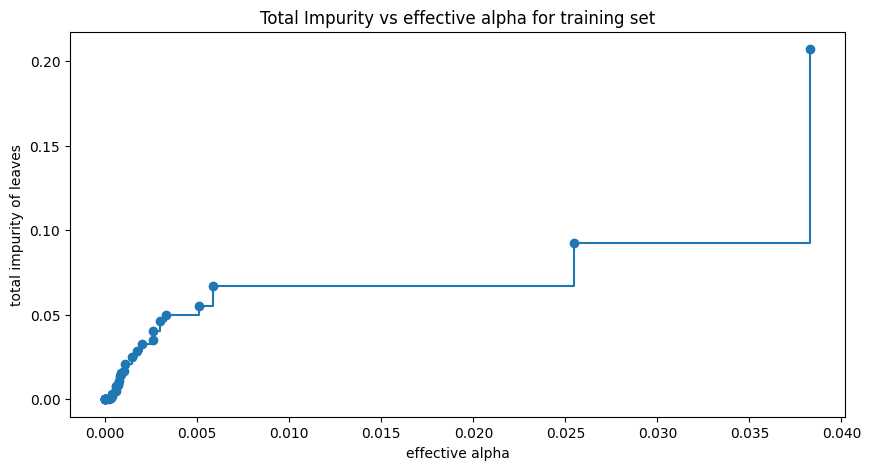

In [105]:
# Visualize  total impurity versus efective alpha training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Train the model using effective alphas

In [106]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2929483828526869


For the remainder, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is not a useful tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

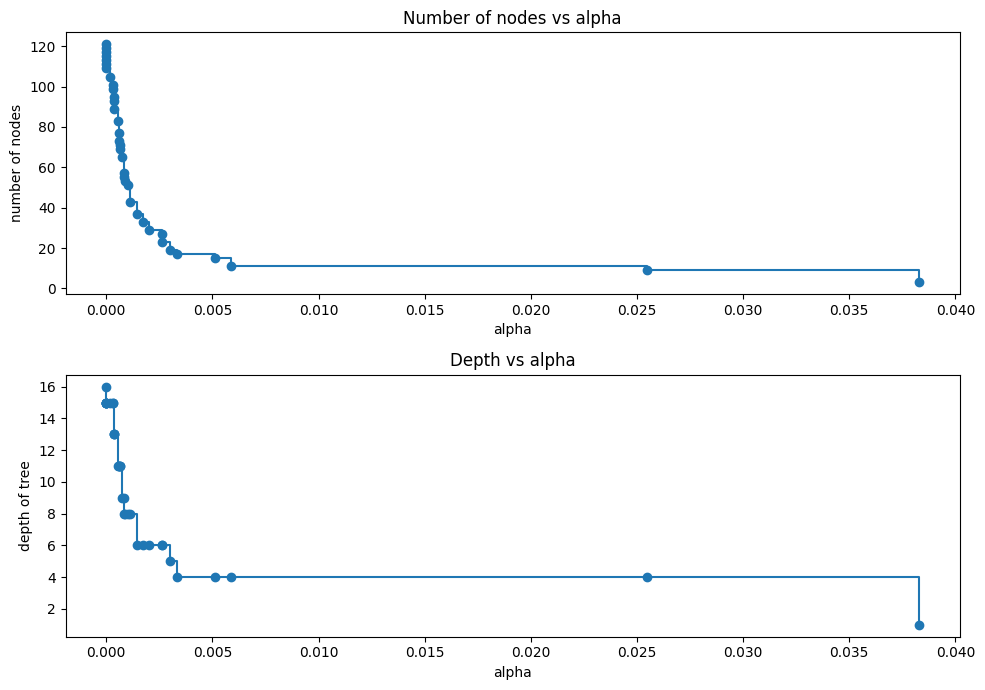

In [107]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* optimal tree depth is around 4-5
* optimal tree nodes is around 20-15

In [108]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [109]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [110]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

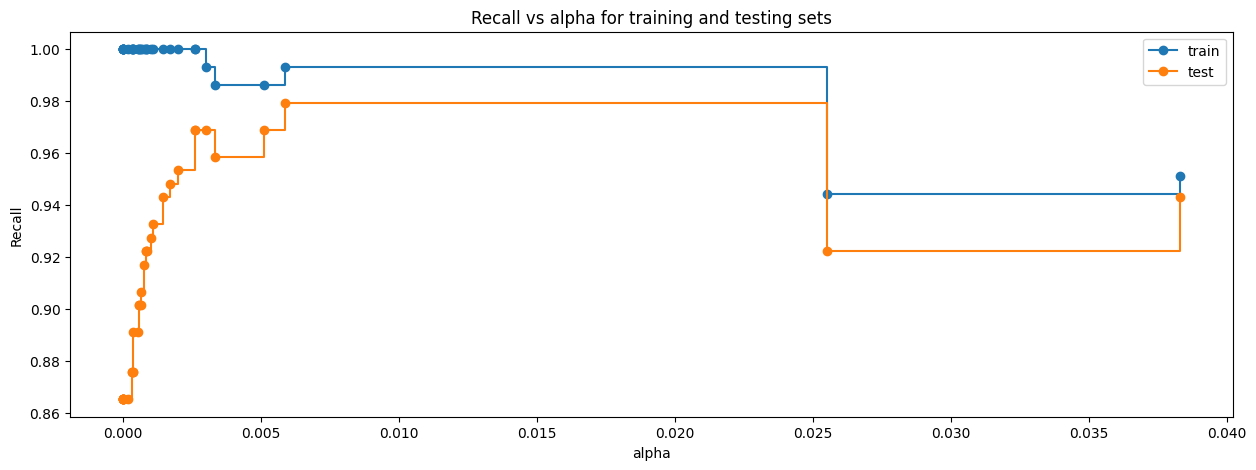

In [111]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [112]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005860326443585521, class_weight='balanced',
                       random_state=1)


#### Checking performance on train dataset (Post-Pruning)

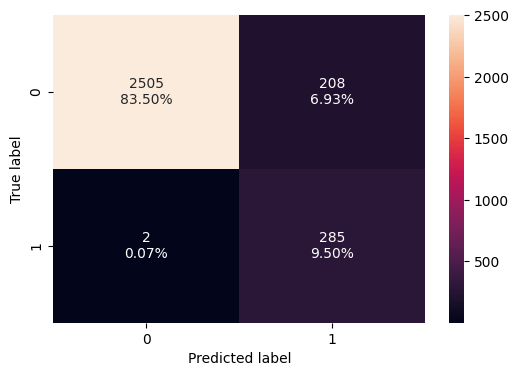

In [113]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [114]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.93,0.993031,0.578093,0.730769


* Model post pruning shows a good balance between accuracy, a very high recall and precision

#### Checking performance on test dataset (Post-pruning)

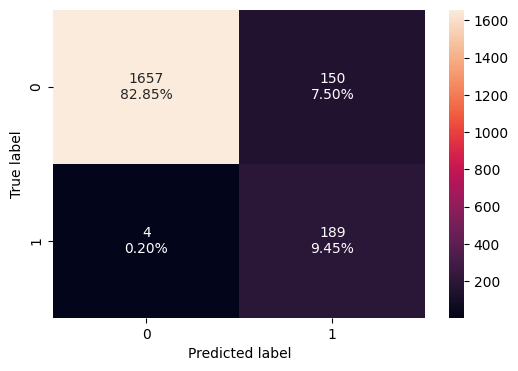

In [115]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [116]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.923,0.979275,0.557522,0.710526


* In the post-pruned tree also, the model is giving a generalized
 result since the recall scores on both the train and test data are coming to be around 0.98 which shows that the model is able to generalize well on unseen data.

#### Decision tree visualization (Post-Pruning)

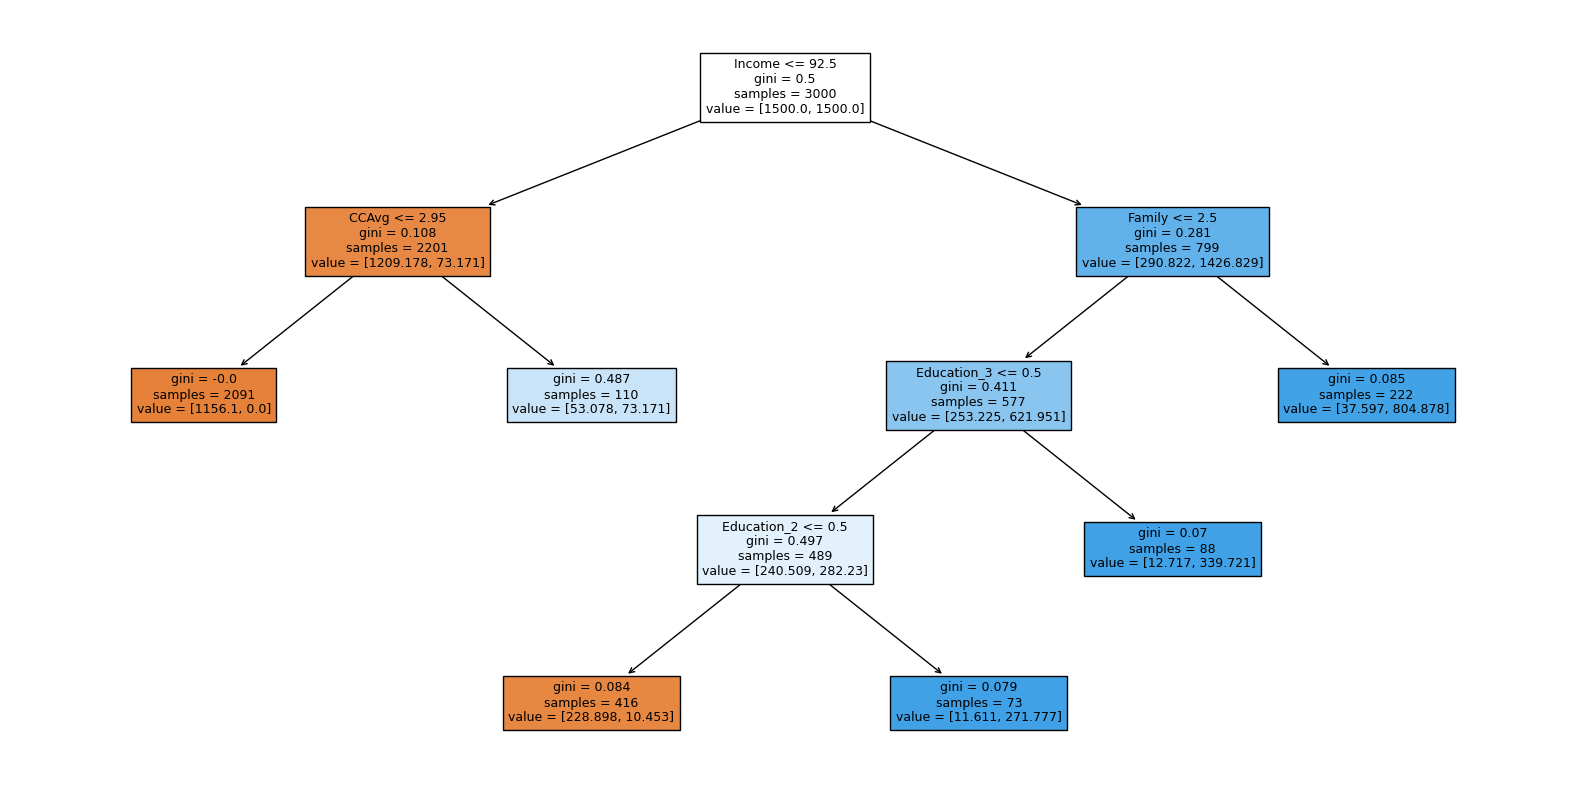

In [117]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### Decision tree rules in Text (Post-pruning)

In [118]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1156.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [53.08, 73.17] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [228.90, 10.45] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [11.61, 271.78] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [12.72, 339.72] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [37.60, 804.88] class: 1



We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

#### Importance of features visualization

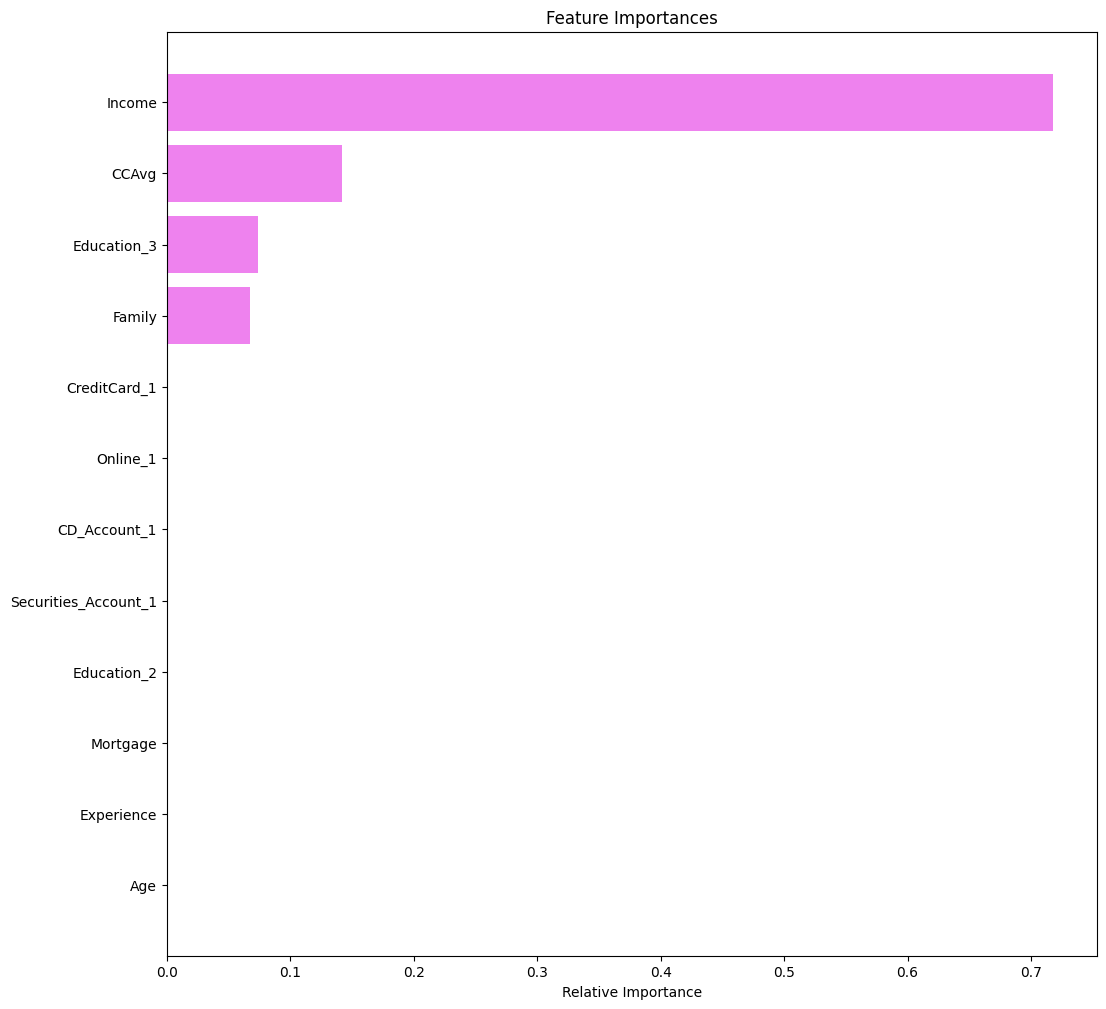

In [119]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Similarly to pre-pruned decision tree, in post prunned the most importante atributes to predict loan acceptance are Income, Credit card spending, family and education level

## Model Comparison and Final Model Selection

#### Comparison of models with Train dataset

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [

        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [

    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.804333,0.930000
Recall,1.0,1.000000,0.993031
Precision,1.0,0.328375,0.578093
F1,1.0,0.494401,0.730769


Both pre-prunning and post-prunning are able to generalize better but the post-prunning decision tree has a much higher accuracy and precision than pre-prunning tree on train data

#### Comparison of modes with test dataset

In [121]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [

    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.979500,0.785000,0.923000
Recall,0.865285,0.989637,0.979275
Precision,0.917582,0.308562,0.557522
F1,0.890667,0.470443,0.710526


* Decision tree models with pre-pruning and post-pruning both are giving a very high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving has high precision score and accuracy on the train and test sets than the pre-pruned tree.

## Actionable Insights and Business Recommendations


### Actionable Insights and Business Recommendations


Based on the analysis and modeling of the personal loan campaign data for AllLife Bank, here are several actionable insights and recommendations for the bank to enhance its marketing strategies and improve the conversion rate of liability customers to personal loan customers:

1. Target High-Income Customers with High Credit Card Spending
Income and credit card spending are the most significant predictors of personal loan acceptance. Customers with higher incomes and higher credit card spending are more likely to accept personal loans. The bank should focus its marketing efforts on high-income customers, particularly those with significant credit card spending. Personalized loan offers with attractive terms could be provided to these customers to increase the likelihood of loan acceptance.

2. Focus on Customers with Higher Education Levels
Customers with higher education levels (Advanced/Professional and Graduate) show a higher acceptance rate for personal loans.The bank should tailor marketing campaigns to highlight the benefits of personal loans for educational advancement or other professional development opportunities. This could resonate well with highly educated customers.

3. Leverage Family Size in Marketing
Customers with larger families are more likely to accept personal loans.
The bank should create targeted marketing campaigns that emphasize financial security and support for families. Highlight how personal loans can help in meeting family needs, such as education, healthcare, or housing.

4. Promote Loans to Customers with Existing Relationships
Customers who already have a deposit account or a securities account with the bank show a higher likelihood of accepting personal loans.The bank could utilize cross-selling strategies to promote personal loans to customers who already have other types of accounts with the bank. Emphasize the convenience and benefits of consolidating financial services with AllLife Bank.

5. Age-Specific Marketing
Insight: Customers in the age groups 30-40 and 60-70 show a slightly higher acceptance rate for personal loans. The bank could develop age-specific marketing strategies that address the unique financial needs and goals of these age groups. For example, younger customers may be interested in loans for starting a business or buying a home, while older customers might be looking at retirement planning or healthcare expenses.

6. Reevaluate Credit Card Offers
30% of customers have credit cards from other banks. The bank should investigate the reasons why customers prefer credit cards from other banks and address these gaps. Consider offering competitive credit card products or bundling credit cards with personal loan offers to attract these customers.

### Further Analysis and Next Steps


1. Segmentation Analysis
Perform a deeper segmentation analysis to identify more granular customer segments based on behavioral and demographic attributes. This can further refine targeting strategies.

2. Customer Feedback and Surveys
Gather feedback from customers who declined the loan offers to understand their concerns and barriers. This information can be used to improve product offerings and marketing strategies.

3. Predictive Maintenance of Models
Continuously monitor the performance of the predictive model and update it with new data to ensure its accuracy and relevance over time. Implementing automated model retraining pipelines can help in maintaining the model’s effectiveness.

4. Explore Additional Data Sources
Consider integrating additional data sources such as social media activity, transaction history, and customer service interactions to enrich the dataset and enhance the predictive power of the model.


### Using Decision tree (Post-Prunning) for a Marketing campaign on Personal Loan

The post-pruning decision tree provides a clear and simplified model that helps identify the most important factors influencing a customer's decision to accept a personal loan. AllLife Bank can develop targeted marketing campaigns that align with the identified key attributes.

**Example Campaign Strategy Based on Post-Pruning Decision Tree**

The decision tree revealed several key segments and conditions under which customers are more likely to accept personal loans. Below is an example of how to define and implement marketing campaigns based on these insights.

Segment campaign 1:

Customers with an income greater than 92.50k usd and moderate to high credit card spending (CCAvg > 2.95k).
Campaign Strategy:

Send personalized loan offers to high-income customers, emphasizing the benefits of using loans for investment, luxury purchases, or significant life events such as weddings or travel. Include exclusive benefits such as lower interest rates, flexible repayment options, and quick approval processes to entice these customers.

Segment campaign 2:

Customers with a family size of 2.5 or less and those who have advanced/professional education levels.

Campaign Strategy:

Organize webinars and workshops focused on financial planning, investment strategies, and the advantages of personal loans for educated professionals.
Also, promote personal loans as a means to finance professional development, higher education, or starting a business. Highlight success stories and testimonials from similar customer profiles.

Segment campaign 3:

Customers with a family size greater than 2.5 and an income between 92.50k and 116.50k usd.

Campaign Strategy:

Family-Oriented Loan Offers: Develop loan products specifically designed for family needs, such as home renovations, education expenses for children, or family vacations. Emphasize how these loans can improve their family's quality of life.

Segment campaign 4:

Target Segment: Customers who already have a securities account or a CD account with the bank.

Campaign Strategy:

Loyalty Rewards Program: Implement a loyalty rewards program that offers additional incentives for taking personal loans, such as reward points, cashback offers, or fee waivers. Utilize customer data to identify cross-selling opportunities. For instance, offer personal loans to customers with securities accounts who might need liquidity for investments or to those with CD accounts nearing maturity.














## Convert file to HTML

In [123]:
# Define the notebook path
notebook_path = '/content/drive/MyDrive/Loan_Modelling_Sebastian_Barros_Drive.ipynb'

# Convert the notebook to HTML
!jupyter nbconvert --to html "$notebook_path"

# Define the HTML file name based on the notebook file name
html_file_name = 'Loan_Modelling_Sebastian_Barros_Drive.html'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Loan_Modelling_Sebastian_Barros_Drive.ipynb to html
[NbConvertApp] Writing 3050572 bytes to /content/drive/MyDrive/Loan_Modelling_Sebastian_Barros_Drive.html
